In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import nltk
import Levenshtein as lev
import fuzzywuzzy 

C:\Users\adity\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
os.listdir()

['.gitkeep',
 '.ipynb_checkpoints',
 'gamedata.xlsx',
 'metacritic_games.csv',
 'metacritic_game_info.csv',
 'metacritic_game_user_comments.csv',
 'vgsales-12-4-2019.csv',
 'vgsales.csv',
 'Video_games_eda.ipynb',
 'video_games_metacritic1.csv',
 'video_games_metacritic_since_2000.csv',
 'Video_Games_Sales_as_at_22_Dec_2016.csv']

# Data Ingestion in pandas

In [26]:
tidy_tuesday_data=pd.read_csv('video_games_metacritic1.csv')
#ign_data=pd.read_excel('gamedata.xlsx',sheet_name=0)
metacritic_data=pd.read_csv('video_games_metacritic_since_2000.csv')
meta_data=pd.read_csv('metacritic_games.csv')

# Text model

In [12]:
text_meta=pd.read_csv('metacritic_game_info.csv')
metacritic_game_user_comments=pd.read_csv('metacritic_game_user_comments.csv')

In [429]:
text_meta

Unnamed: 0                                 Title  Year  \
0              0  The Legend of Zelda: Ocarina of Time  1998   
1              1              Tony Hawk's Pro Skater 2  2000   
2              2                   Grand Theft Auto IV  2008   
3              3                           SoulCalibur  1999   
4              4                   Grand Theft Auto IV  2008   
...          ...                                   ...   ...   
4995        4995                          Donut County  2018   
4996        4996                MotorStorm: Apocalypse  2011   
4997        4997                          The Last Guy  2008   
4998        4998         Valiant Hearts: The Great War  2014   
4999        4999                         Mothergunship  2018   

                   Publisher  \
0                   Nintendo   
1     NeversoftEntertainment   
2              RockstarNorth   
3                      Namco   
4              RockstarNorth   
...                      ...   
4995             BenEsposito   
4996        EvolutionStudios   
4997          SCEJapanStudio   
4998      UbisoftMontpellier   
4999             GripDigital   

                                                  Genre      Platform  \
0                              Action Adventure;Fantasy    Nintendo64   
1                      Sports;Alternative;Skateboarding   PlayStation   
2             Action Adventure;Modern;Modern;Open-World  PlayStation3   
3                                    Action;Fighting;3D     Dreamcast   
4             Action Adventure;Modern;Modern;Open-World       Xbox360   
...                                                 ...           ...   
4995                           Action Adventure;General            PC   
4996  Driving;Racing;Simulation;Rally / Offroad;Rall...  PlayStation3   
4997             Action Adventure;Sci-Fi;Sci-Fi;General  PlayStation3   
4998                 Platformer;2D;Action;Platformer;2D  PlayStation4   
4999                                     Action;General       XboxOne   

     Metascore Avg_Userscore             No_Players  
0           99           9.1               1 Player  
1           98           7.4                   1-2   
2           98           7.5               1 Player  
3           98           8.6                   1-2   
4           98           7.9               1 Player  
...        ...           ...                    ...  
4995        77           8.1  No Online Multiplayer  
4996        77           7.7              4  Online  
4997        77           6.8               1 Player  
4998        77           8.4          not specified  
4999        77           7.2     Online Multiplayer  

[5000 rows x 9 columns]

# Sales model

In [13]:
sales_2019=pd.read_csv('vgsales-12-4-2019.csv')
sales=pd.read_csv('vgsales.csv')

In [83]:
sales.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [427]:
##KNN FOR EACH

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [428]:
sales_2019

Rank                           Name                      basename  \
0          1                     Wii Sports                    wii-sports   
1          2              Super Mario Bros.              super-mario-bros   
2          3                 Mario Kart Wii                mario-kart-wii   
3          4  PlayerUnknown's Battlegrounds  playerunknowns-battlegrounds   
4          5              Wii Sports Resort             wii-sports-resort   
...      ...                            ...                           ...   
55787  55788                    Indivisible                   indivisible   
55788  55789                     Lost Ember                    lost-amber   
55789  55790                     Lost Ember                    lost-amber   
55790  55791                     Lost Ember                    lost-amber   
55791  55792                     Falcon Age                    falcon-age   

                  Genre ESRB_Rating Platform         Publisher  \
0                Sports           E      Wii          Nintendo   
1              Platform         NaN      NES          Nintendo   
2                Racing           E      Wii          Nintendo   
3               Shooter         NaN       PC  PUBG Corporation   
4                Sports           E      Wii          Nintendo   
...                 ...         ...      ...               ...   
55787      Role-Playing         NaN       PC         505 Games   
55788         Adventure          RP       PC   Mooneye Studios   
55789         Adventure          RP      PS4   Mooneye Studios   
55790         Adventure          RP     XOne   Mooneye Studios   
55791  Action-Adventure         NaN      PS4           Unknown   

              Developer  VGChartz_Score  Critic_Score  ...  NA_Sales  \
0          Nintendo EAD             NaN           7.7  ...       NaN   
1          Nintendo EAD             NaN          10.0  ...       NaN   
2          Nintendo EAD             NaN           8.2  ...       NaN   
3      PUBG Corporation             NaN           NaN  ...       NaN   
4          Nintendo EAD             NaN           8.0  ...       NaN   
...                 ...             ...           ...  ...       ...   
55787    Lab Zero Games             NaN           NaN  ...       NaN   
55788   Mooneye Studios             NaN           NaN  ...       NaN   
55789   Mooneye Studios             NaN           NaN  ...       NaN   
55790   Mooneye Studios             NaN           NaN  ...       NaN   
55791   Outerloop Games             NaN           NaN  ...       NaN   

       PAL_Sales  JP_Sales  Other_Sales    Year  Last_Update  \
0            NaN       NaN          NaN  2006.0          NaN   
1            NaN       NaN          NaN  1985.0          NaN   
2            NaN       NaN          NaN  2008.0  11th Apr 18   
3            NaN       NaN          NaN  2017.0  13th Nov 18   
4            NaN       NaN          NaN  2009.0          NaN   
...          ...       ...          ...     ...          ...   
55787        NaN       NaN          NaN  2019.0  11th Apr 19   
55788        NaN       NaN          NaN  2019.0  11th Apr 19   
55789        NaN       NaN          NaN  2019.0  11th Apr 19   
55790        NaN       NaN          NaN  2019.0  11th Apr 19   
55791        NaN       NaN          NaN     NaN  12th Apr 19   

                                                     url  status  \
0      http://www.vgchartz.com/game/2667/wii-sports/?...       1   
1      http://www.vgchartz.com/game/6455/super-mario-...       1   
2      http://www.vgchartz.com/game/6968/mario-kart-w...       1   
3      http://www.vgchartz.com/game/215988/playerunkn...       1   
4      http://www.vgchartz.com/game/24656/wii-sports-...       1   
...                                                  ...     ...   
55787  http://www.vgchartz.com/game/224682/indivisibl...       1   
55788  http://www.vgchartz.com/games/game.php?id=2246...       1   
55789  http://www.vgchartz.com/game/224690/l

## Starting with general model

In [14]:
tidy_tuesday_data.head()

number                            game  release_date  price  \
0       1                     Half-Life 2  Nov 16, 2004   9.99   
1       3          Counter-Strike: Source   Nov 1, 2004   9.99   
2      21  Counter-Strike: Condition Zero   Mar 1, 2004   9.99   
3      47         Half-Life 2: Deathmatch   Nov 1, 2004   4.99   
4      36               Half-Life: Source   Jun 1, 2004   9.99   

                     owners developer publisher  average_playtime  \
0  10,000,000 .. 20,000,000     Valve     Valve             110.0   
1  10,000,000 .. 20,000,000     Valve     Valve             236.0   
2  10,000,000 .. 20,000,000     Valve     Valve              10.0   
3   5,000,000 .. 10,000,000     Valve     Valve               0.0   
4    2,000,000 .. 5,000,000     Valve     Valve               0.0   

   median_playtime  metascore  
0             66.0       96.0  
1            128.0       88.0  
2              3.0       65.0  
3              0.0        NaN  
4              0.0        NaN

In [15]:
ign_data.head()

Game       Platform  Score                Genre
0  Wolfenstein: The New Order       Xbox One    7.8              Shooter
1                Mario Kart 8          Wii U    9.0       Racing, Action
2               Sportsfriends  PlayStation 3    8.7  Action, Compilation
3               Sportsfriends  PlayStation 4    8.7  Action, Compilation
4               Sportsfriends             PC    8.7  Action, Compilation

In [18]:
metacritic_data.head()

metascore                name console userscore          date
0         97  Grand Theft Auto V     PS3       8.3  Sep 17, 2013
1         97  Grand Theft Auto V    X360       8.3  Sep 17, 2013
2         95      The Last of Us     PS3       9.2  Jun 14, 2013
3         94   BioShock Infinite     PS3       8.5  Mar 26, 2013
4         94   BioShock Infinite      PC       8.6  Mar 25, 2013

In [24]:
text_meta.head()

Unnamed: 0                                 Title  Year  \
0           0  The Legend of Zelda: Ocarina of Time  1998   
1           1              Tony Hawk's Pro Skater 2  2000   
2           2                   Grand Theft Auto IV  2008   
3           3                           SoulCalibur  1999   
4           4                   Grand Theft Auto IV  2008   

                Publisher                                      Genre  \
0                Nintendo                   Action Adventure;Fantasy   
1  NeversoftEntertainment           Sports;Alternative;Skateboarding   
2           RockstarNorth  Action Adventure;Modern;Modern;Open-World   
3                   Namco                         Action;Fighting;3D   
4           RockstarNorth  Action Adventure;Modern;Modern;Open-World   

       Platform Metascore Avg_Userscore No_Players  
0    Nintendo64        99           9.1   1 Player  
1   PlayStation        98           7.4       1-2   
2  PlayStation3        98           7.5   1 Player  
3     Dreamcast        98           8.6       1-2   
4       Xbox360        98           7.9   1 Player

In [29]:
meta_data.shape

(5699, 15)

In [30]:
metacritic_data.shape

(15647, 5)

In [31]:
text_meta.shape

(5000, 9)

In [32]:
ign_data.shape

(17534, 4)

In [41]:
metacritic_data['console'].value_counts()

PC        3963
X360      1666
PS2       1421
PS4       1373
PS3       1265
XONE       805
XBOX       794
DS         727
WII        663
PSP        514
GC         452
GBA        442
Switch     435
3DS        393
VITA       255
WIIU       186
PS         135
DC         121
N64         34
 VITA        2
 PC          1
Name: console, dtype: int64

In [47]:
gaming_consoles=['XONE','PC','PS4']

relevant_meta1=metacritic_data[metacritic_data.console.isin(gaming_consoles)]

In [45]:
meta_data.platform.value_counts(normalize=True)

PC        0.375154
PS4       0.250746
XONE      0.137568
Switch    0.092297
3DS       0.067205
VITA      0.044569
WIIU      0.032462
Name: platform, dtype: float64

In [48]:
relevant_meta2=meta_data[meta_data.platform.isin(gaming_consoles)]

In [51]:
relevant_meta2['game'].value_counts()

Anthem                                  3
Battlefield Hardline                    3
Metro Redux                             3
Vampyr                                  3
Virginia                                3
                                       ..
Paranautical Activity                   1
Clandestine                             1
Polybius                                1
Book of Demons                          1
Deception IV: The Nightmare Princess    1
Name: game, Length: 3074, dtype: int64

In [53]:
relevant_meta2

game platform                   developer  \
0                        Portal 2       PC              Valve Software   
1     The Elder Scrolls V: Skyrim       PC       Bethesda Game Studios   
3             Batman: Arkham City       PC          Rocksteady Studios   
5       Deus Ex: Human Revolution       PC             Nixxes Software   
7             Total War: Shogun 2       PC           Creative Assembly   
...                           ...      ...                         ...   
5693                  Crackdown 3       PC  Sumo Digital, Elbow Rocket   
5695                       Fimbul      PS4                       Zaxis   
5696              Generation Zero       PC           Avalanche Studios   
5697                         Vane      PS4                Friend & Foe   
5698                   Left Alive      PS4     Square Enix, ilinx inc.   

                 genre         number_players rating  release_date  \
0               Action                    NaN   E10+  Apr 18, 2011   
1         Role-Playing  No Online Multiplayer      M  Nov 10, 2011   
3     Action Adventure                    NaN      T  Nov 21, 2011   
5               Action  No Online Multiplayer      M  Aug 23, 2011   
7             Strategy     Online Multiplayer      T  Mar 15, 2011   
...                ...                    ...    ...           ...   
5693  Action Adventure              Up to 10       M  Feb 15, 2019   
5695  Action Adventure  No Online Multiplayer    NaN  Feb 28, 2019   
5696  Action Adventure     Online Multiplayer      T  Mar 26, 2019   
5697         Adventure  No Online Multiplayer   E10+  Jan 15, 2019   
5698  Action Adventure  No Online Multiplayer      M  Mar  5, 2019   

      positive_critics  neutral_critics  negative_critics  positive_users  \
0                   51                1                 0            1700   
1                   32                0                 0            1616   
3                   27                0                 0             240   
5                   52                0                 0             520   
7                   62                0                 0             187   
...                ...              ...               ...             ...   
5693                 2               11                 3              12   
5695                 0                7                 2               1   
5696                 1               11                 6               5   
5697                 3               26                22               2   
5698                 1                7                27              25   

      neutral_users  negative_users  metascore  user_score  
0               107              19         95          90  
1               322             451         94          82  
3                34              27         91          87  
5               112              78         90          85  
7                44              29         90          84  
...             ...             ...        ...         ...  
5693              4              15         55          29  
5695              0               0         52          18  
5696              2               6         50          57  
5697              2               2         49          55  
5698              8              21         37          79  

[4351 rows x 15 columns]

In [416]:
tuesday_clean

game  price                    owners  \
0                         Half-Life 2   9.99  10,000,000 .. 20,000,000   
1              Counter-Strike: Source   9.99  10,000,000 .. 20,000,000   
2      Counter-Strike: Condition Zero   9.99  10,000,000 .. 20,000,000   
3             Half-Life 2: Deathmatch   4.99   5,000,000 .. 10,000,000   
4                   Half-Life: Source   9.99    2,000,000 .. 5,000,000   
...                               ...    ...                       ...   
26683                       Draw Near    NaN               0 .. 20,000   
26684                           Alone   0.99               0 .. 20,000   
26685                       qrth-phyl   4.99               0 .. 20,000   
26686                  Guns and Notes   9.99               0 .. 20,000   
26687   VANILLA - GARDEN OF JUDGEMENT  14.99               0 .. 20,000   

       average_playtime  median_playtime               developer  \
0                 110.0             66.0                   Valve   
1                 236.0            128.0                   Valve   
2                  10.0              3.0                   Valve   
3                   0.0              0.0                   Valve   
4                   0.0              0.0                   Valve   
...                 ...              ...                     ...   
26683               0.0              0.0             Omniscience   
26684               0.0              0.0      Killed Pixel Games   
26685               0.0              0.0                  Verran   
26686               0.0              0.0              VR Factory   
26687               0.0              0.0  CHARON, Kaoru Nekofuji   

                publisher  
0                   Valve  
1                   Valve  
2                   Valve  
3                   Valve  
4                   Valve  
...                   ...  
26683     Taiga Nishimura  
26684  Killed Pixel Games  
26685              Verran  
26686          VR Factory  
26687              CHARON  

[26688 rows x 7 columns]

In [110]:
columns_for_tuesday=['game','price','owners','average_playtime','median_playtime','developer','publisher']
tuesday_clean=tidy_tuesday_data[columns_for_tuesday]

In [111]:
final_games_data=relevant_meta2.sort_values(by='game').merge(tuesday_clean,on='game',how='left')

In [118]:
final_games_data=final_games_data.drop('developer_y',axis=1).rename(columns={'developer_x':'developer'})

TOP 50 Developers

In [119]:
final_games_data.developer.value_counts()

Telltale Games                                 141
Capcom                                          70
Ubisoft Montreal                                44
EA Sports                                       38
Codemasters                                     33
                                              ... 
Black Isle Studios, Beamdog, Overhaul Games      1
Conifer Games                                    1
Mind Candy                                       1
Unfinished Pixel                                 1
Lo-Fi Games                                      1
Name: developer, Length: 1743, dtype: int64

In [149]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

C:\Users\adity\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\adity\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\adity\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\adity\Anaconda3\lib\site-packages\pandas\plotting\_matpl

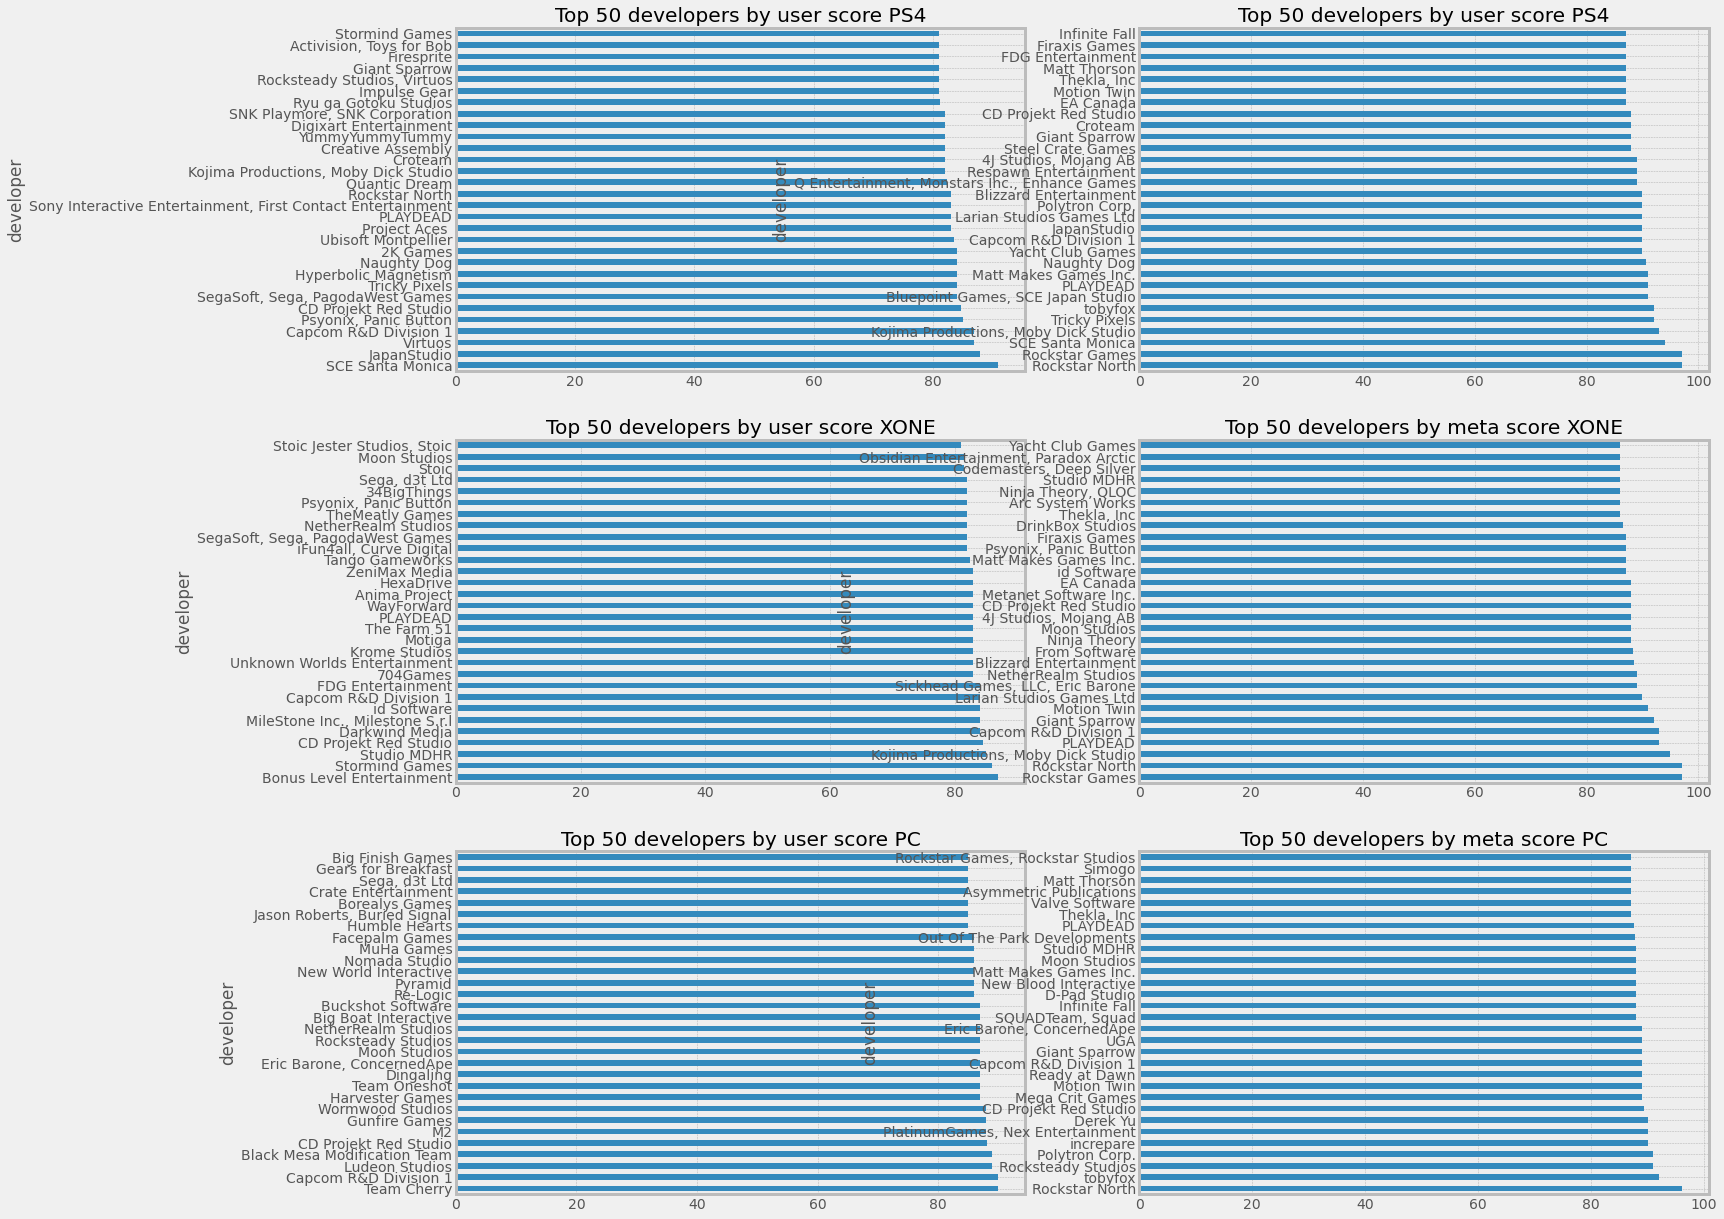

In [150]:
plt.style.use('bmh')

fig,axes=plt.subplots(3,2)
final_games_data[final_games_data.platform=='PS4'].groupby('developer')['user_score'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 developers by user score PS4',ax=axes[0,0],figsize=(20,20))
final_games_data[final_games_data.platform=='PS4'].groupby('developer')['metascore'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 developers by user score PS4',ax=axes[0,1],figsize=(20,20))

final_games_data[final_games_data.platform=='XONE'].groupby('developer')['user_score'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 developers by user score XONE',ax=axes[1,0],figsize=(20,20))
final_games_data[final_games_data.platform=='XONE'].groupby('developer')['metascore'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 developers by meta score XONE',ax=axes[1,1],figsize=(20,20))

final_games_data[final_games_data.platform=='PC'].groupby('developer')['user_score'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 developers by user score PC',ax=axes[2,0],figsize=(20,20))
final_games_data[final_games_data.platform=='PC'].groupby('developer')['metascore'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 developers by meta score PC',ax=axes[2,1],figsize=(20,20))


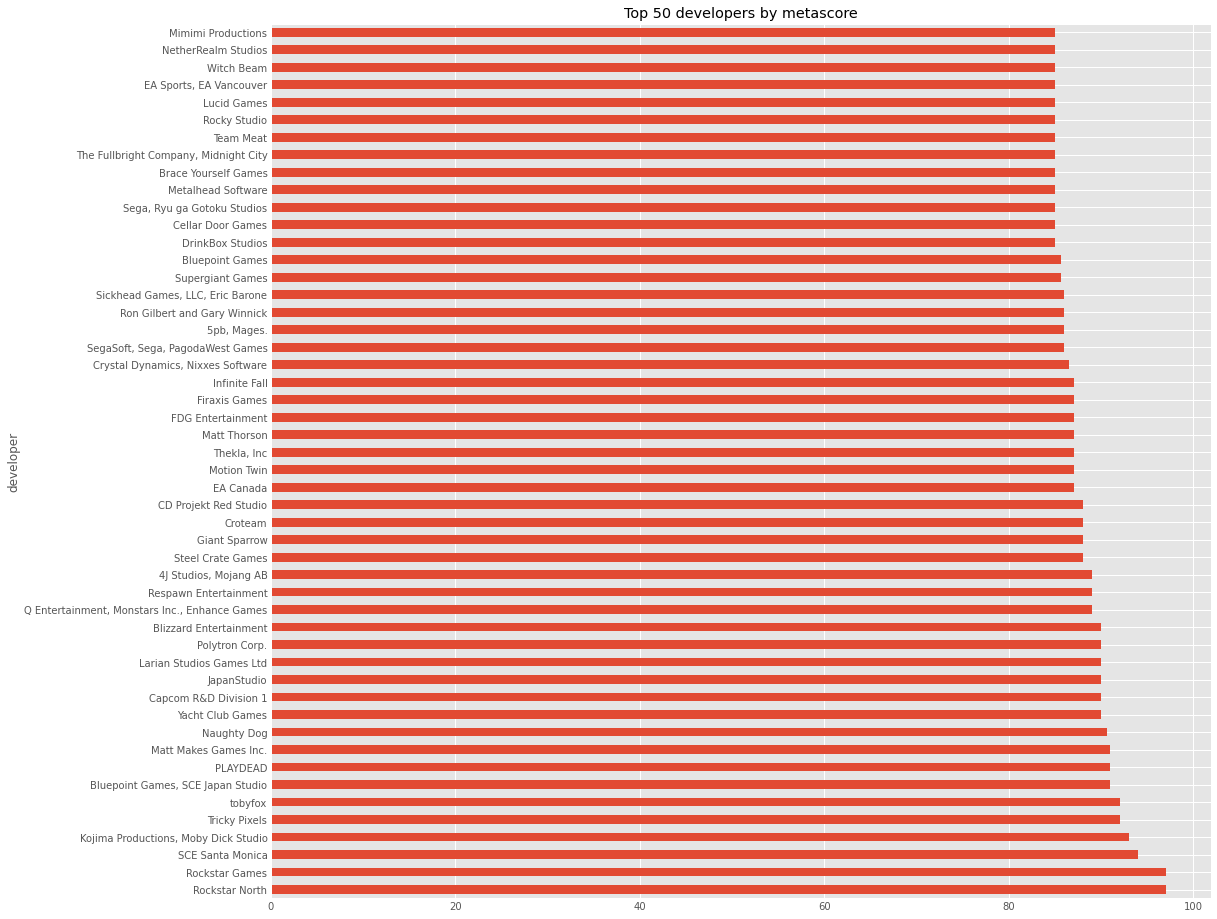

In [132]:
plt.style.use('ggplot')
fig,axes=plt.subplots(1,3,figsize=(40,30))
final_games_data[final_games_data.platform=='PS4'].groupby('developer')['meta_score'].mean().sort_values(ascending=False)[:50].plot(kind='barh',title='Top 50 developers by user score PS4',ax=axes[0])
final_games_data[final_games_data.platform=='XONE'].groupby('developer')['user_score'].mean().sort_values(ascending=False)[:50].plot(kind='barh',title='Top 50 developers by user score XONE',ax=axes[1])
final_games_data[final_games_data.platform=='PC'].groupby('developer')['user_score'].mean().sort_values(ascending=False)[:50].plot(kind='barh',figsize=(15,15),title='Top 50 developers by user score PC',ax=axes[2])

In [98]:
from fuzzywuzzy import fuzz
fuzz.token_set_ratio('10tons','10tons Entertainment, 10tons ')

100

In [100]:
set(final_games_data.developer.tolist())

{nan,
 'The Lordz Games Studio, Flashback Games',
 'Passtech Games',
 'Wolf Brew Games',
 'Electronic Arts',
 'Mega Crit Games',
 'Silent Dreams',
 'MinMax Games Ltd.',
 'Leonard Menchiari',
 'COWCAT',
 'Cadenza',
 'Iceberg Interactive',
 'Nowhere Studios',
 'Curve Studios',
 'Spooky Squid Games',
 'Hammerpoint Interactive',
 'Fictiorama Studios',
 'Spark Unlimited, comcept',
 'Abstraction Games, Blackmill Games',
 'Abstraction Games',
 'Ubisoft Shanghai',
 'Ubisoft, Climax Studios',
 'Llamasoft',
 'Zen Studios',
 'Blue Bottle Games',
 'Image & Form',
 'Phantom Compass',
 'Locomalito',
 'Tripwire Interactive',
 'Chasing Carrots',
 'SCE Japan Studio',
 'Italic Pig',
 'Wizards of the Coast',
 'Twistplay, Ste Curran',
 'Radiation Blue',
 'Coffee Stain Studios',
 'Animation Arts',
 'Investigate North',
 'MixedBag Srl',
 'CUBETYPE',
 'Forever Entertainment S.A., Forever Entertainment',
 'Instant Kingdom',
 'Iceberg Interactive, Kukouri Mobile Entertainment',
 'Shiver Games',
 'inkle, Cape G

TOP 50 Publishers

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\adity\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\adity\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\adity\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax

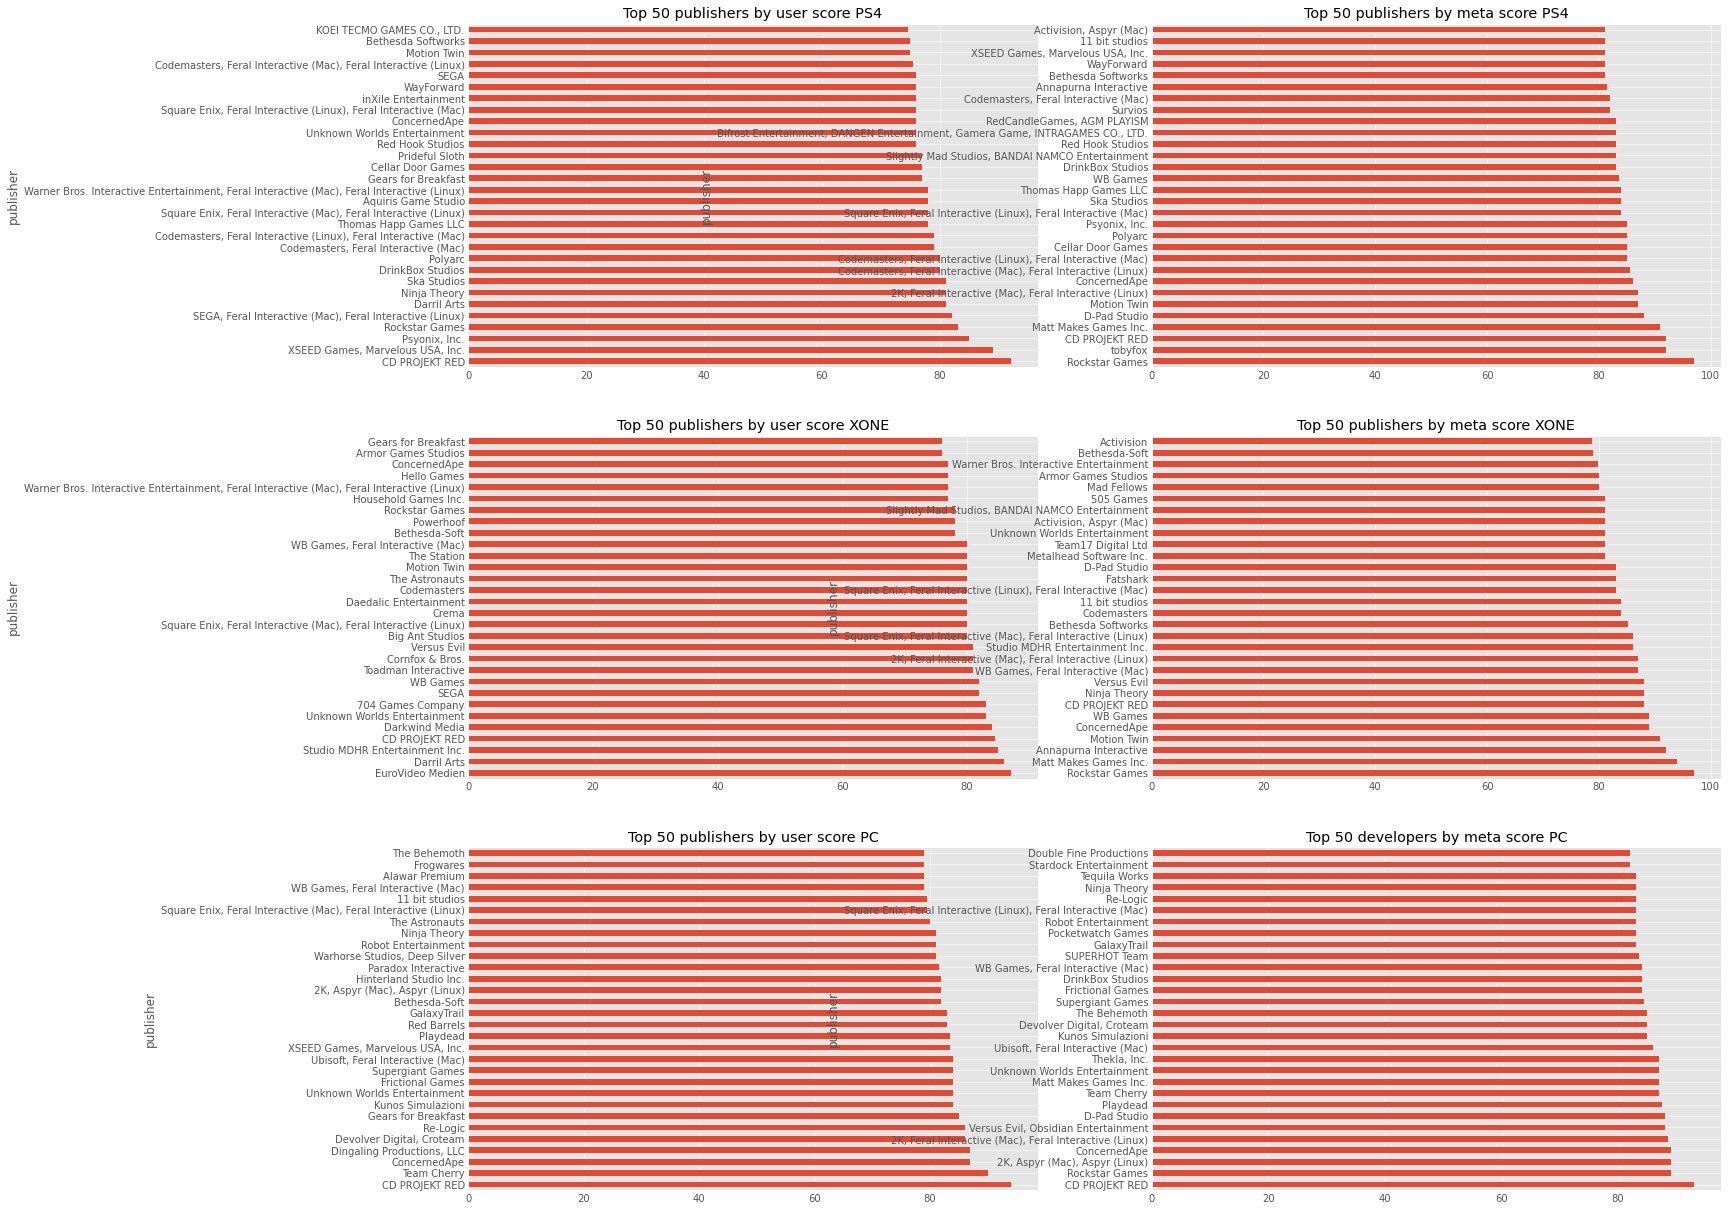

In [152]:
plt.style.use('ggplot')

fig,axes=plt.subplots(3,2)

final_games_data.dropna()[final_games_data.platform=='PS4'].groupby('publisher')['user_score'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 publishers by user score PS4',ax=axes[0,0],figsize=(20,20))
final_games_data.dropna()[final_games_data.platform=='PS4'].groupby('publisher')['metascore'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 publishers by meta score PS4',ax=axes[0,1],figsize=(20,20))

final_games_data.dropna()[final_games_data.platform=='XONE'].groupby('publisher')['user_score'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 publishers by user score XONE',ax=axes[1,0],figsize=(20,20))
final_games_data.dropna()[final_games_data.platform=='XONE'].groupby('publisher')['metascore'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 publishers by meta score XONE',ax=axes[1,1],figsize=(20,20))

final_games_data.dropna()[final_games_data.platform=='PC'].groupby('publisher')['user_score'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 publishers by user score PC',ax=axes[2,0],figsize=(20,20))
final_games_data.dropna()[final_games_data.platform=='PC'].groupby('publisher')['metascore'].mean().sort_values(ascending=False)[:30].plot(kind='barh',title='Top 50 developers by meta score PC',ax=axes[2,1],figsize=(20,20))


Text(0, 0.5, 'metascore')

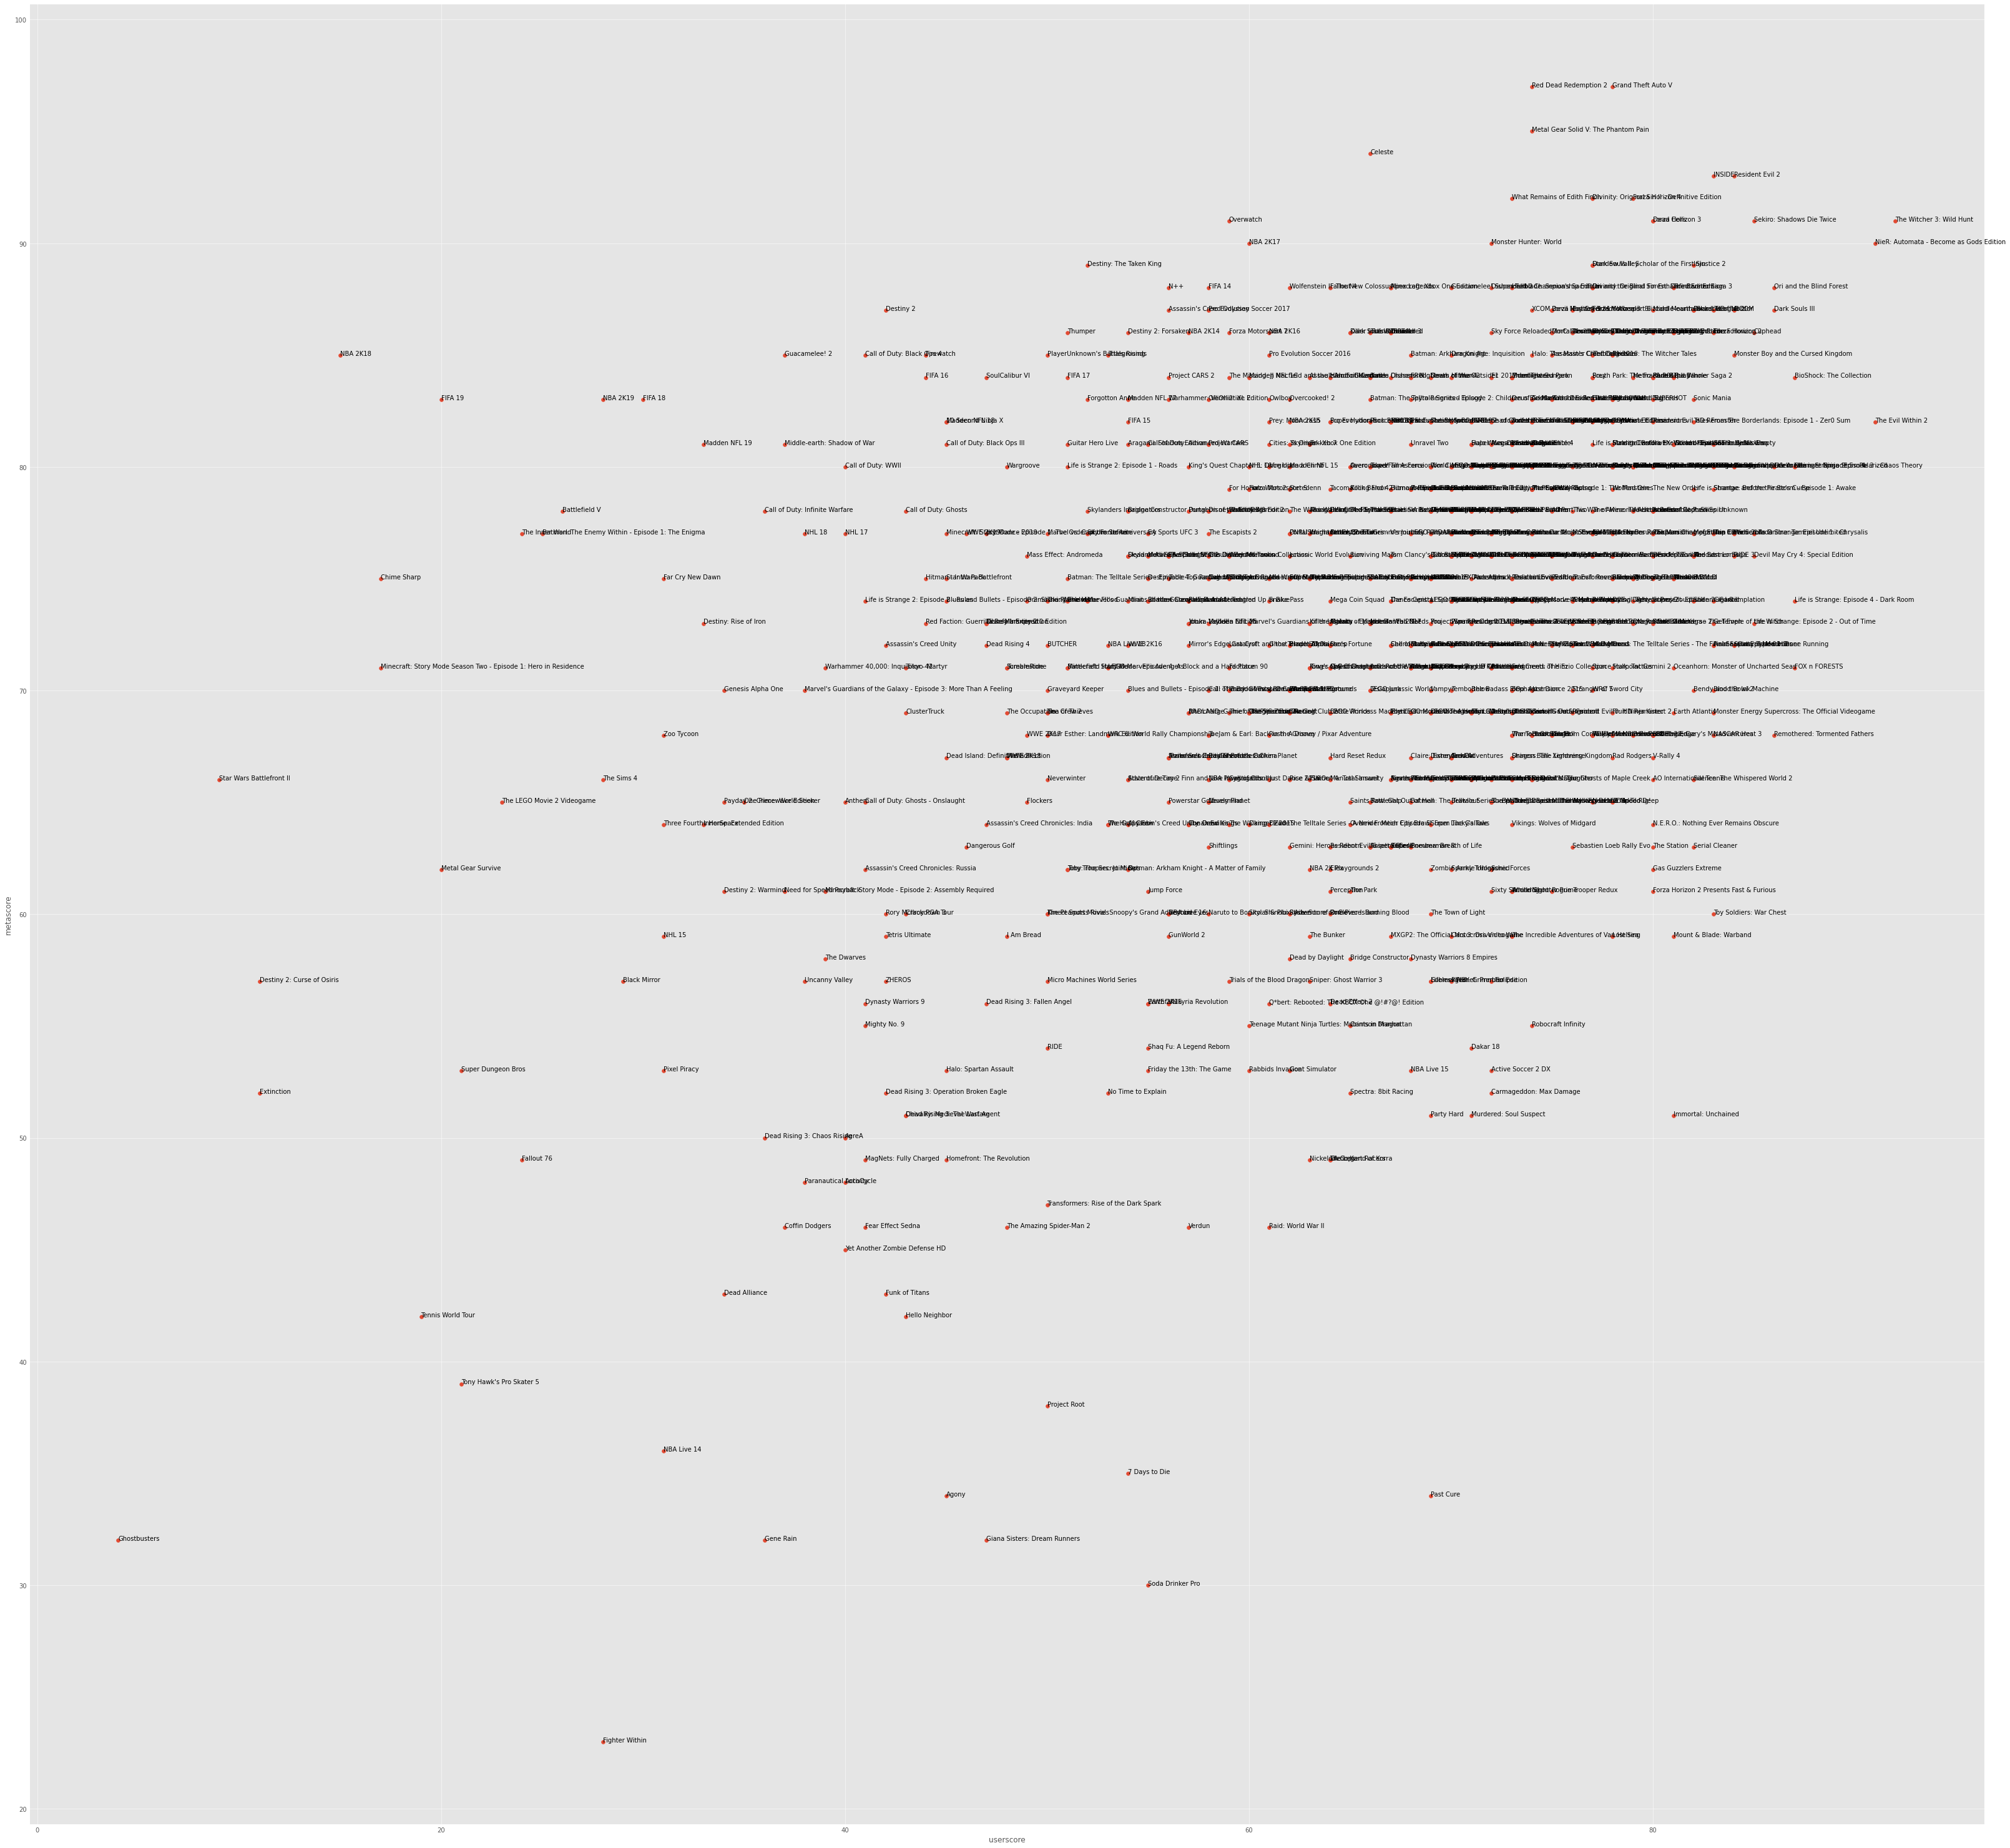

In [166]:
platform='XONE'
xone_games=final_games_data.loc[final_games_data.platform==platform,['game','user_score','metascore']]

plt.figure(figsize=(50,50))

plt.scatter(xone_games['user_score'],xone_games['metascore'])
for game in range(len(xone_games.game)):
    plt.annotate(xone_games.iloc[game,0],xy=(xone_games.iloc[game,1],xone_games.iloc[game,2]))
plt.xlabel('userscore')
plt.ylabel('metascore')

Text(0, 0.5, 'metascore')

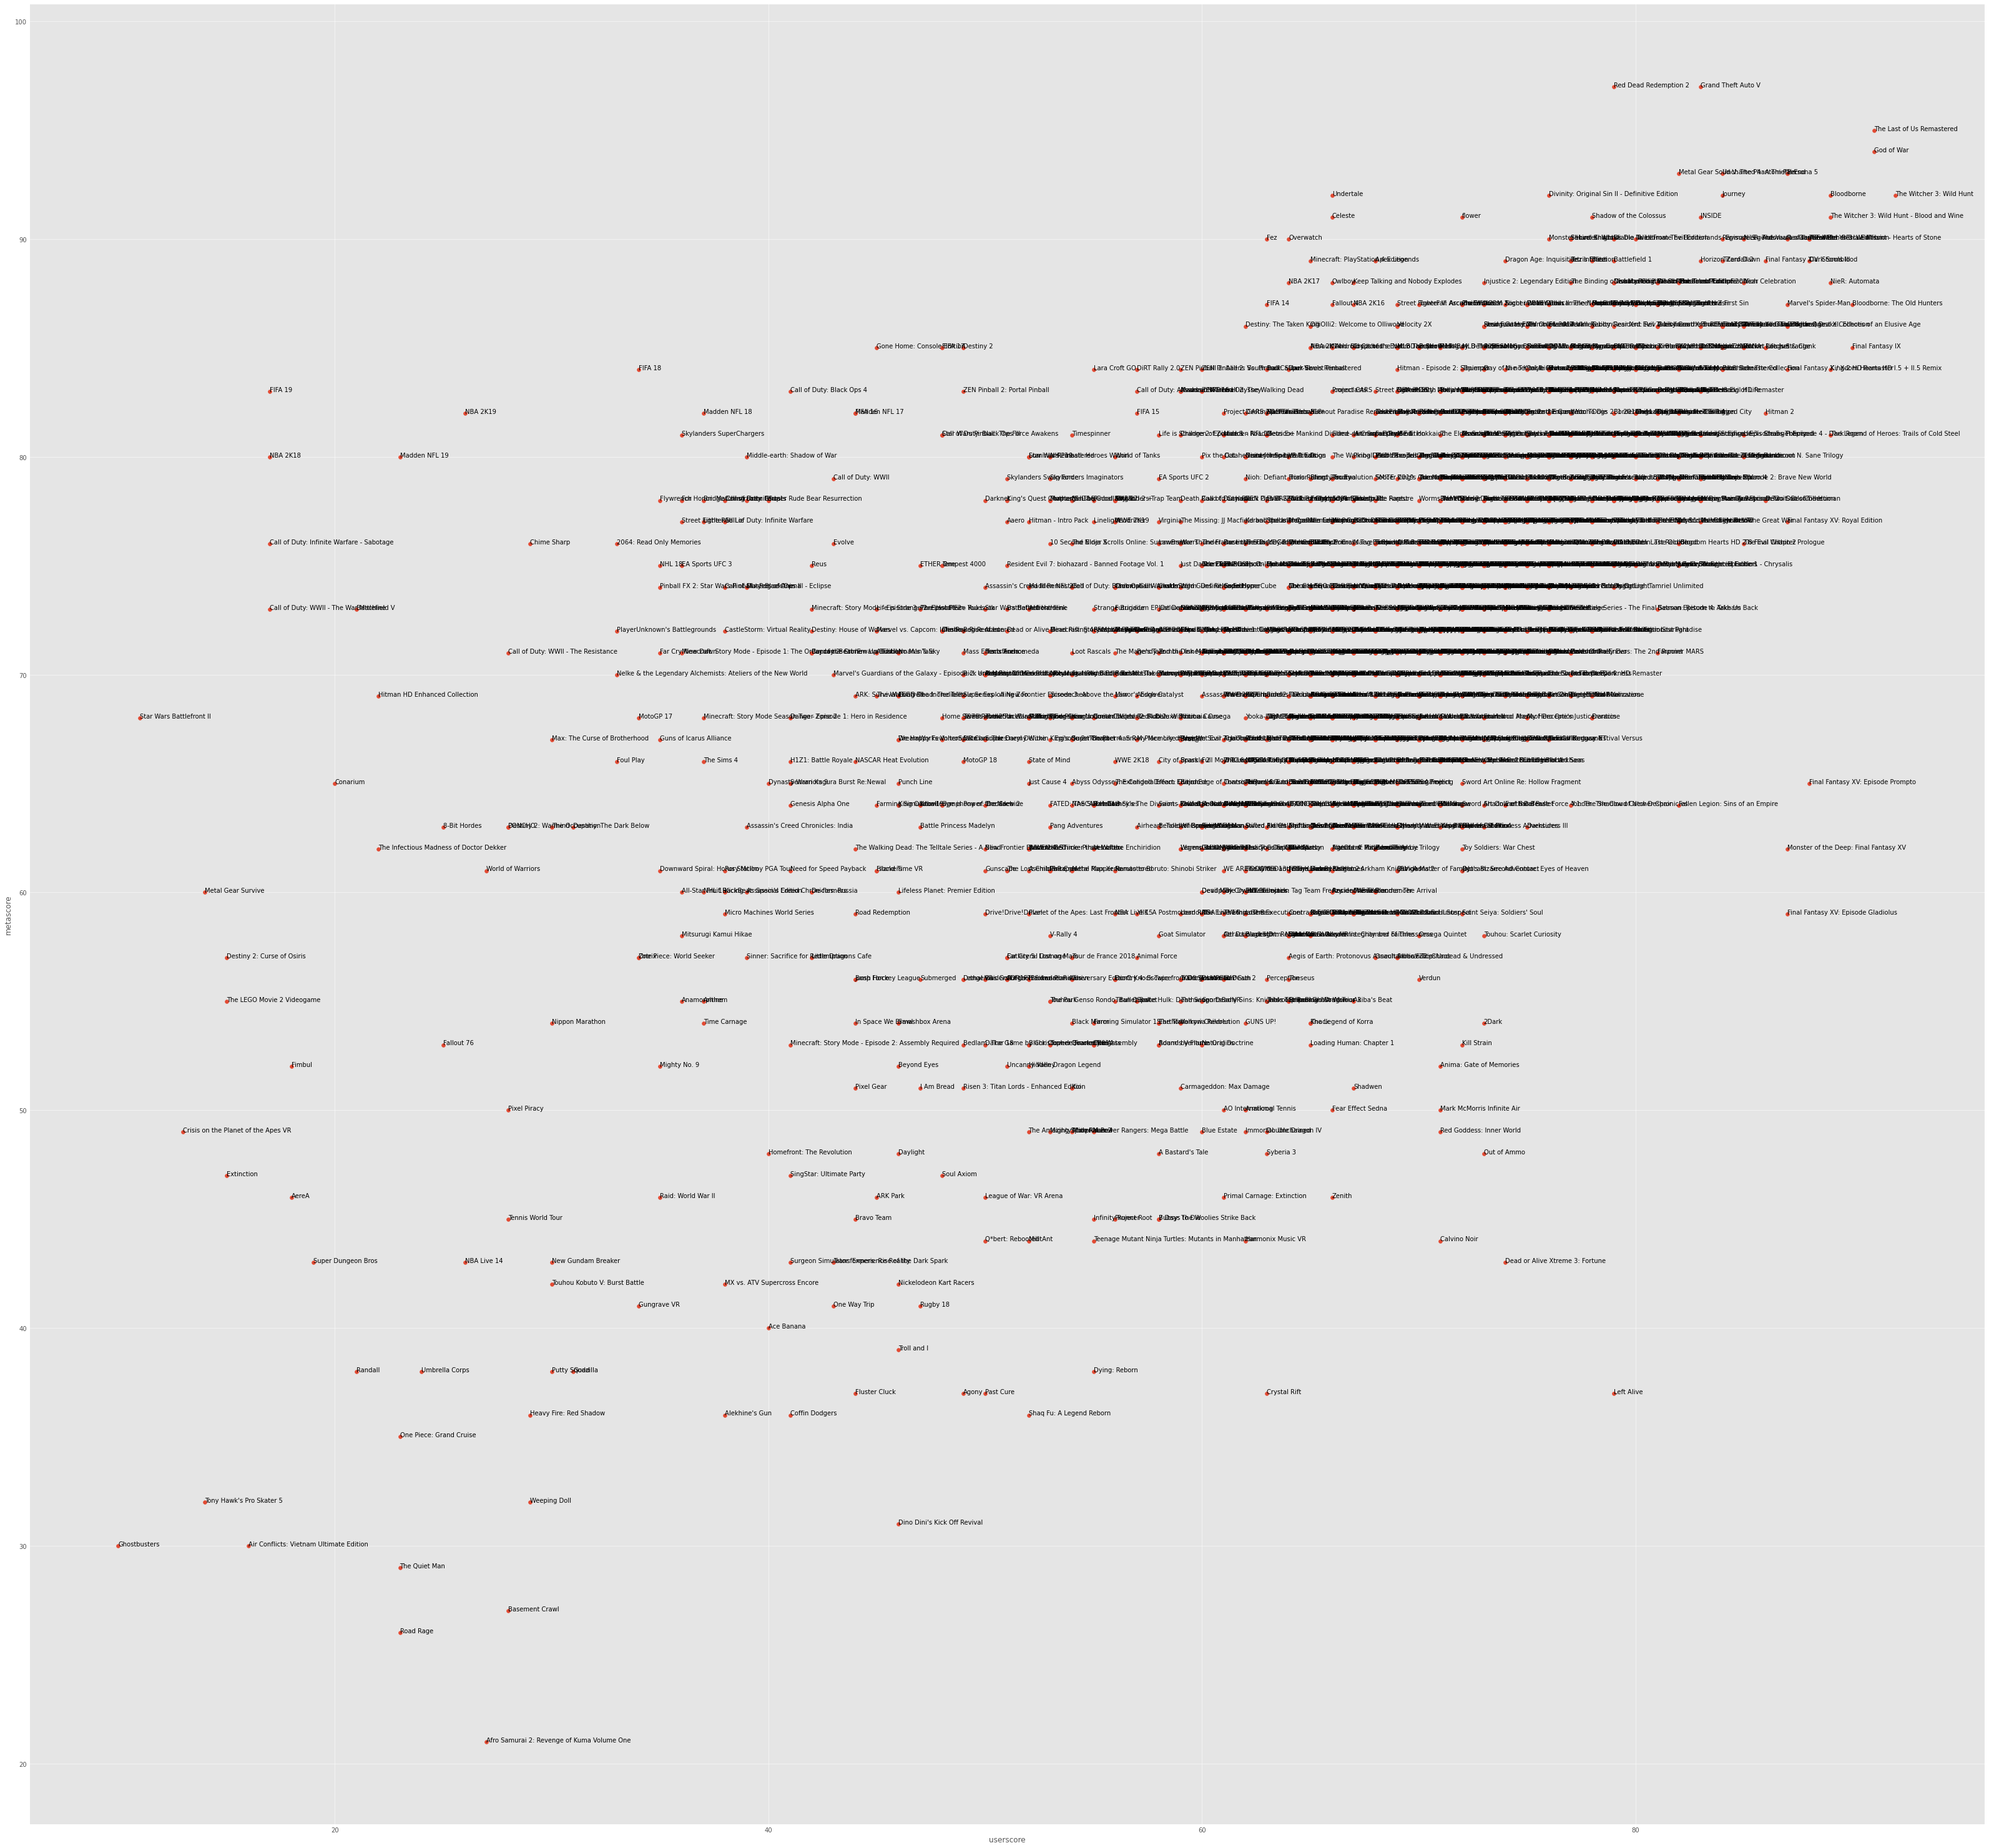

In [167]:
platform='PS4'
xone_games=final_games_data.loc[final_games_data.platform==platform,['game','user_score','metascore']]

plt.figure(figsize=(50,50))

plt.scatter(xone_games['user_score'],xone_games['metascore'])
for game in range(len(xone_games.game)):
    plt.annotate(xone_games.iloc[game,0],xy=(xone_games.iloc[game,1],xone_games.iloc[game,2]),)
plt.xlabel('userscore')
plt.ylabel('metascore')

Text(0, 0.5, 'metascore')

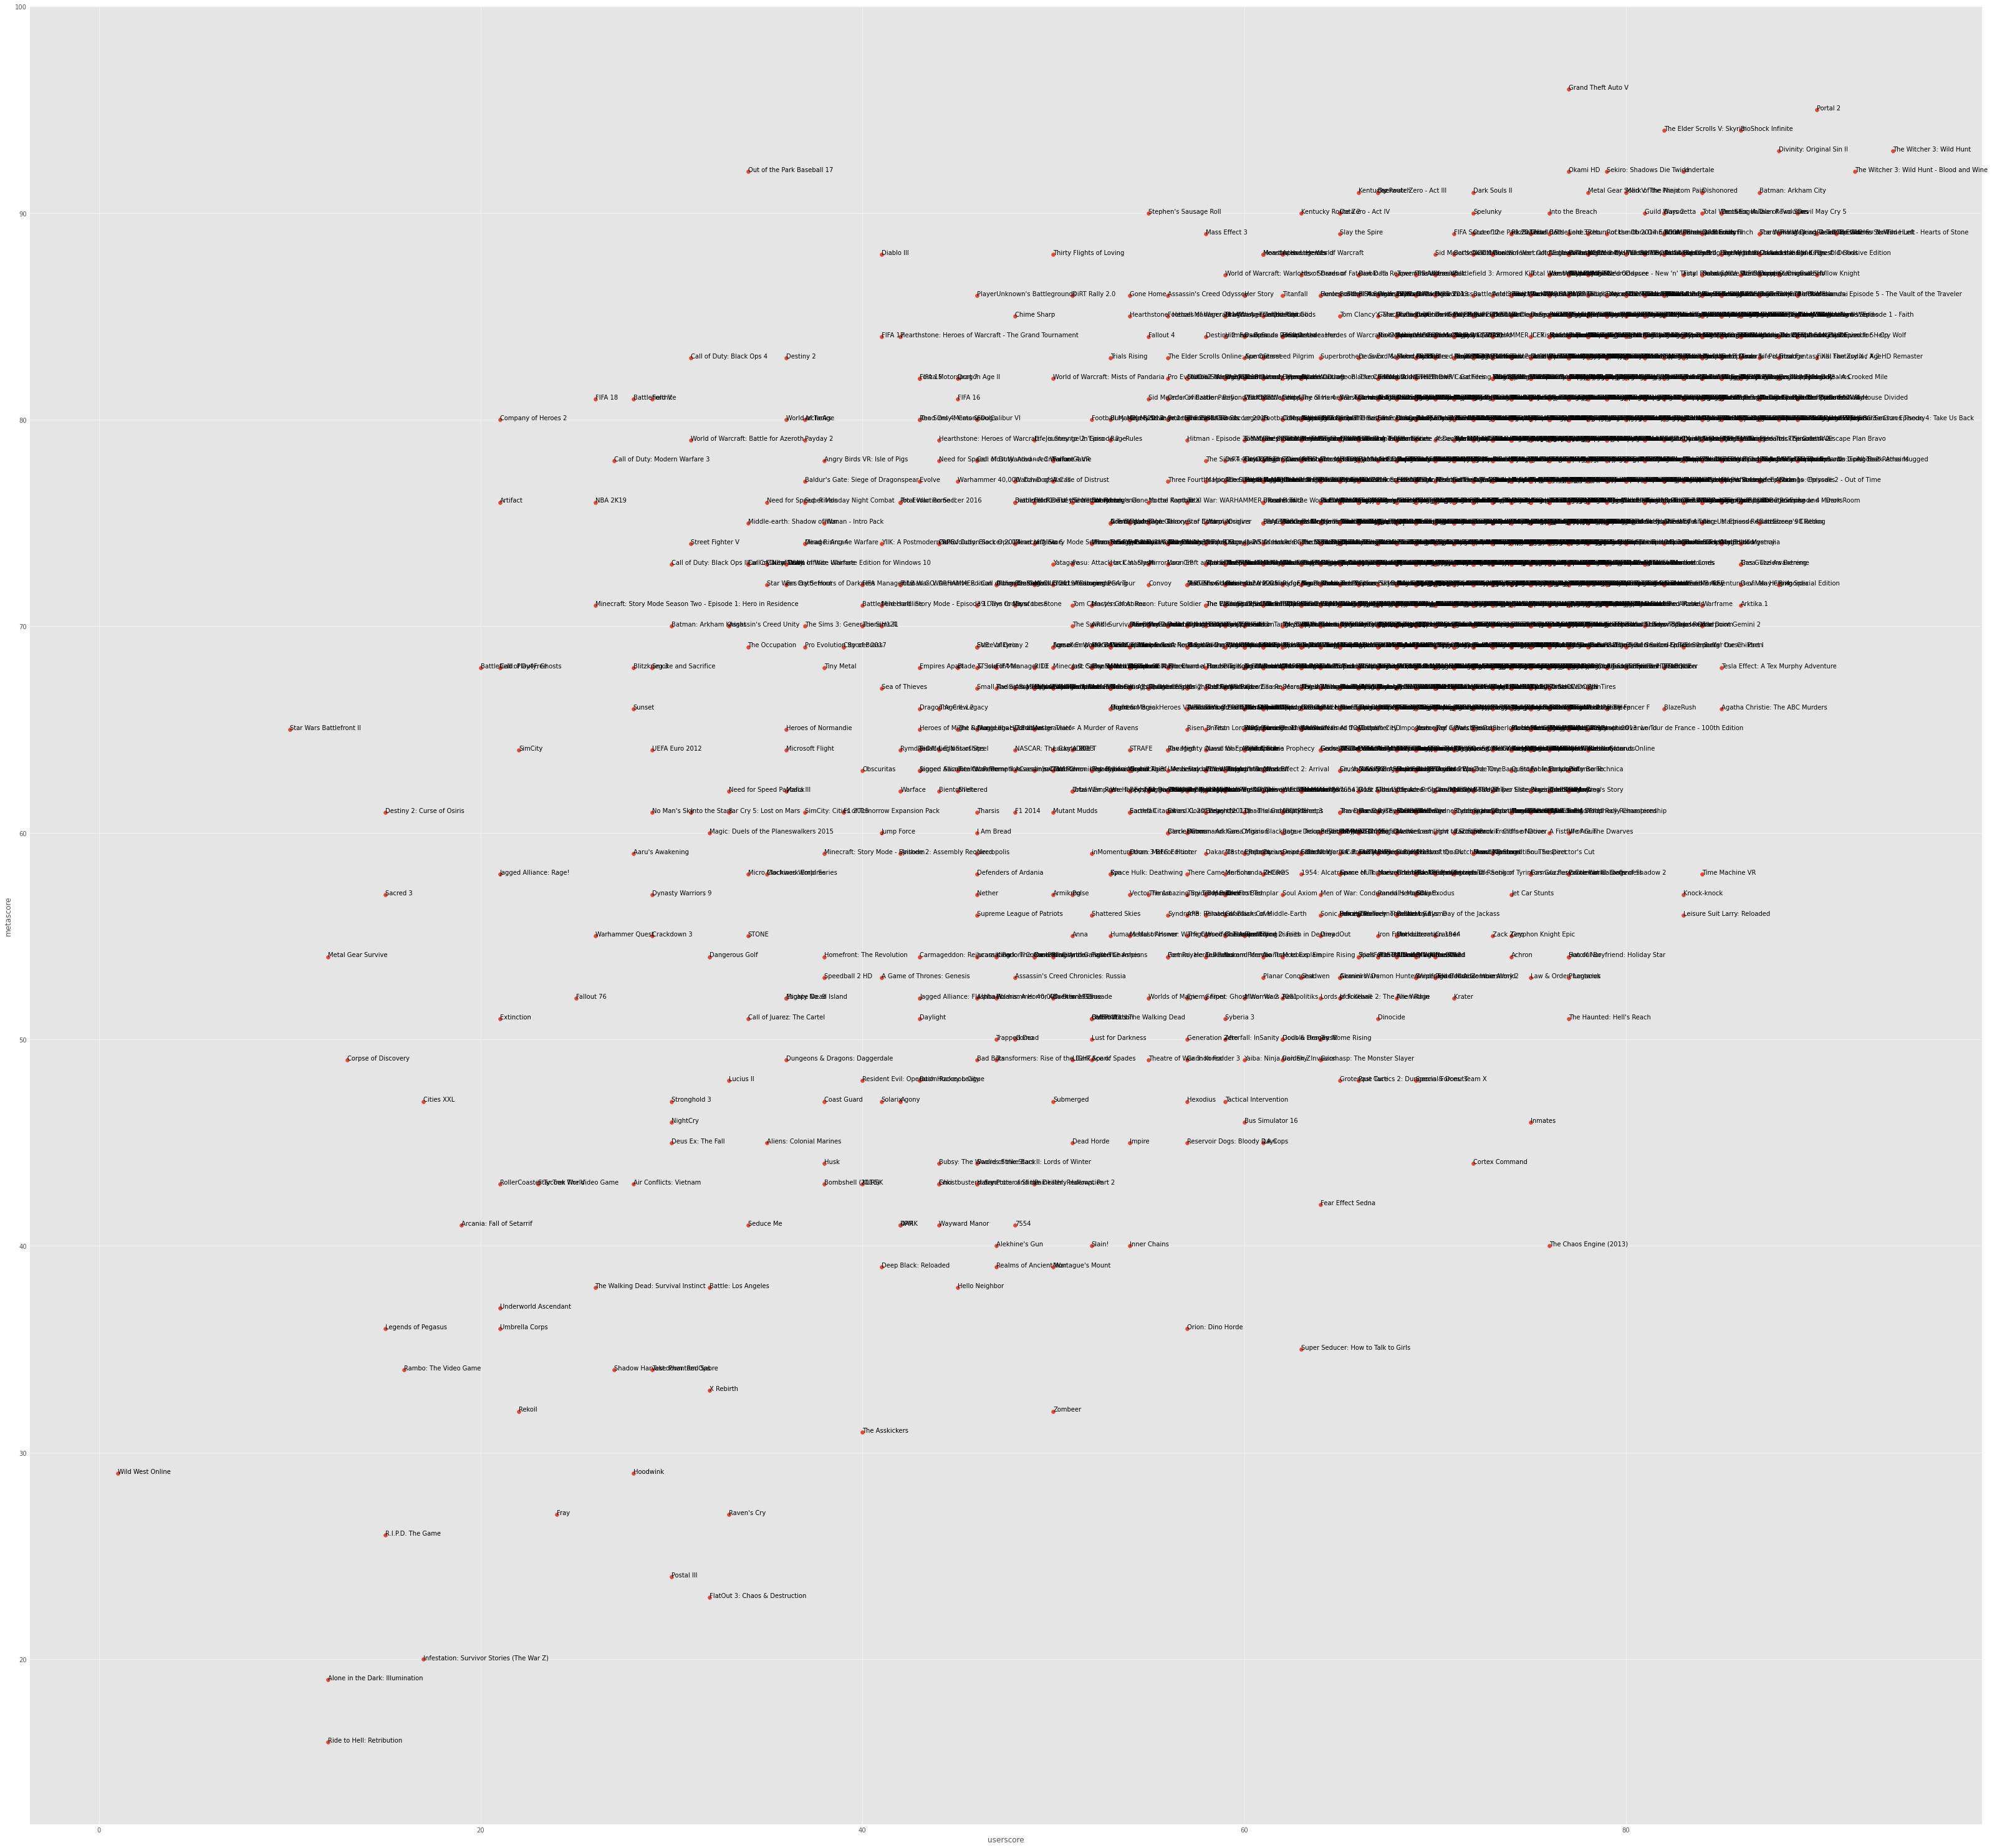

In [168]:
platform='PC'
xone_games=final_games_data.loc[final_games_data.platform==platform,['game','user_score','metascore']]

plt.figure(figsize=(50,50))

plt.scatter(xone_games['user_score'],xone_games['metascore'])
for game in range(len(xone_games.game)):
    plt.annotate(xone_games.iloc[game,0],xy=(xone_games.iloc[game,1],xone_games.iloc[game,2]))
plt.xlabel('userscore')
plt.ylabel('metascore')

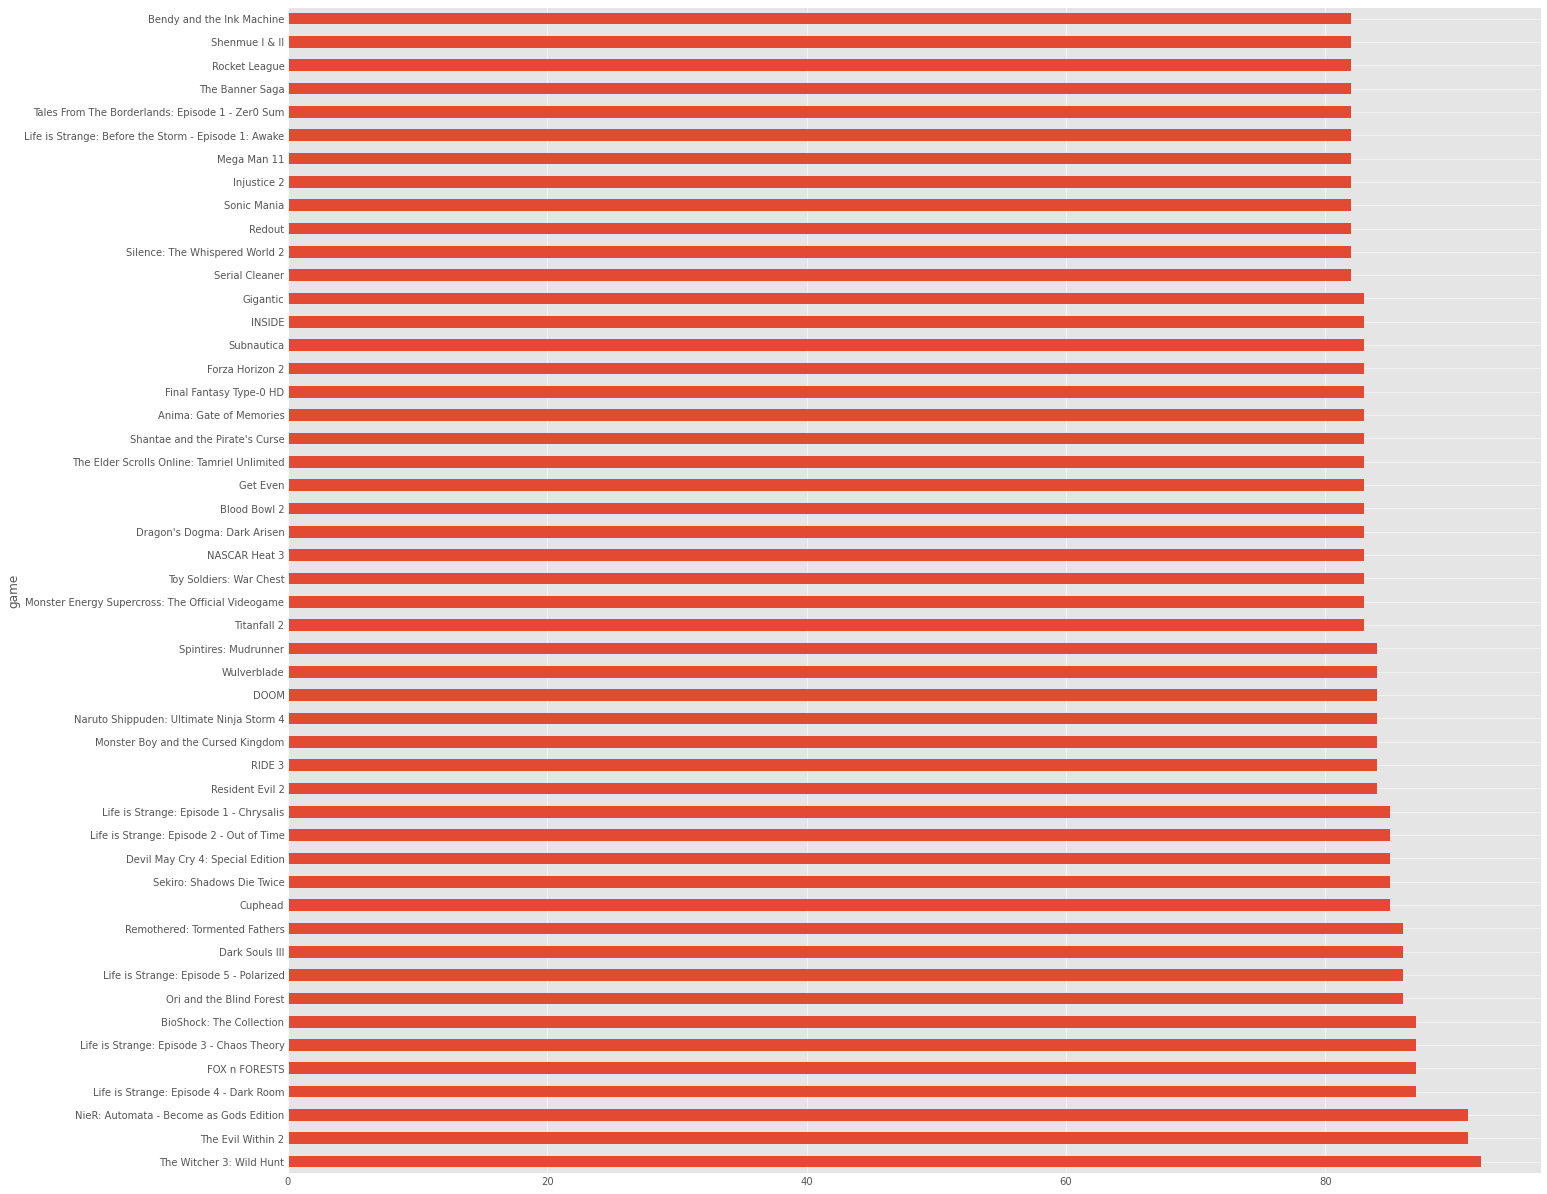

In [171]:
platform='XONE'
xone_games=final_games_data.loc[final_games_data.platform==platform,['game','user_score','metascore']]

plt.figure(figsize=(20,20))

xone_games.set_index('game')['user_score'].sort_values(ascending=False)[:50].plot(kind='barh')

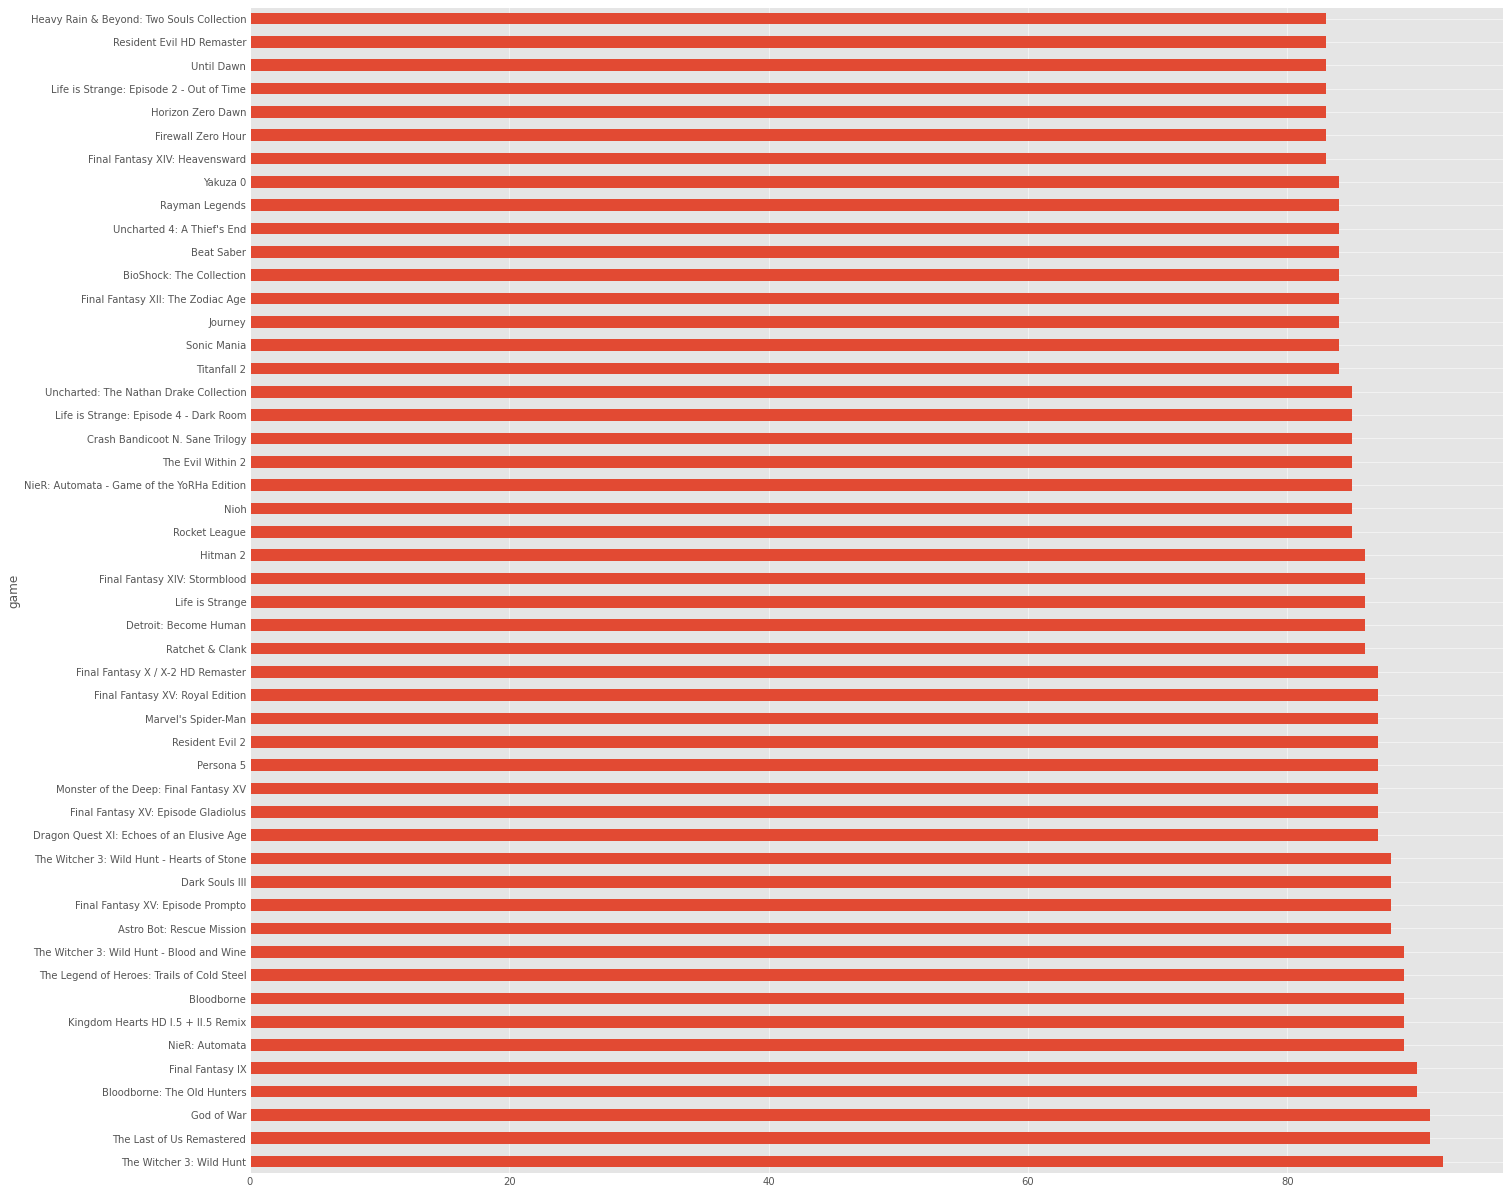

In [172]:
platform='PS4'
xone_games=final_games_data.loc[final_games_data.platform==platform,['game','user_score','metascore']]

plt.figure(figsize=(20,20))

xone_games.set_index('game')['user_score'].sort_values(ascending=False)[:50].plot(kind='barh')

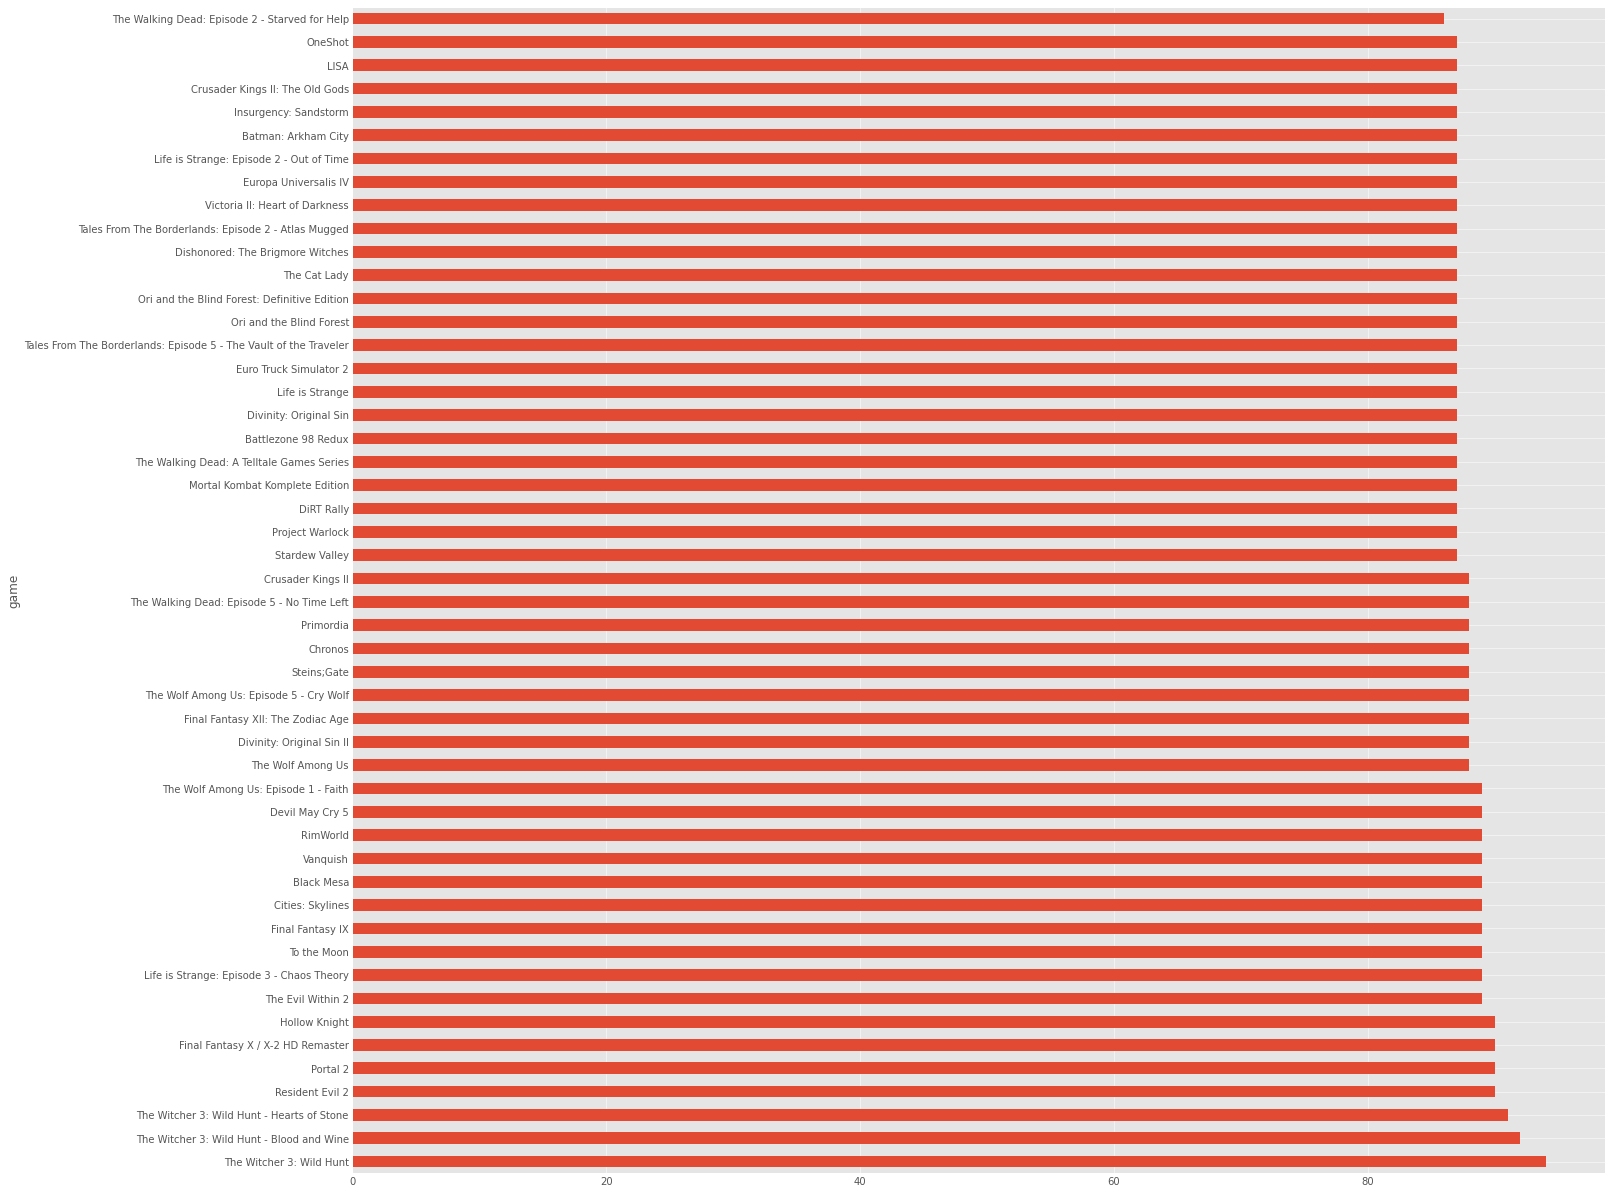

In [173]:
platform='PC'
xone_games=final_games_data.loc[final_games_data.platform==platform,['game','user_score','metascore']]

plt.figure(figsize=(20,20))

xone_games.set_index('game')['user_score'].sort_values(ascending=False)[:50].plot(kind='barh')

C:\Users\adity\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.05, 0.5, 'userscore')

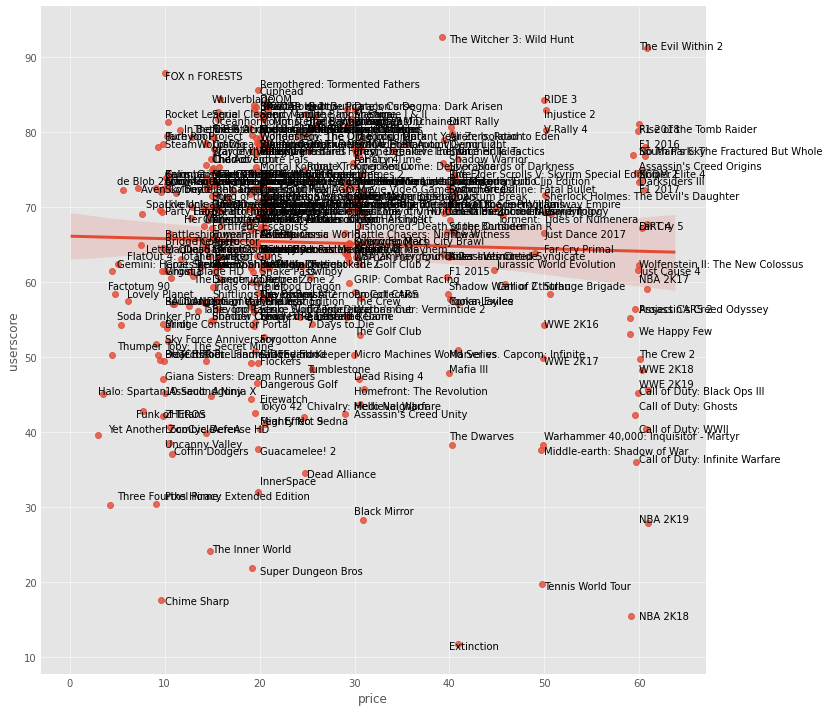

In [202]:
platform='XONE'
xone_games_price=final_games_data.loc[final_games_data.platform==platform,['game','price','user_score','metascore']]
xone_games_price=xone_games_price.dropna()



sns.lmplot('price','user_score',data=xone_games_price,x_jitter=1,y_jitter=1,size=10, height=10)
for game in range(len(xone_games_price.game)):
    plt.annotate(xone_games_price.iloc[game,0],xy=(xone_games_price.iloc[game,1],xone_games_price.iloc[game,2]))
plt.xlabel('price')
plt.ylabel('userscore')


C:\Users\adity\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.05, 0.5, 'userscore')

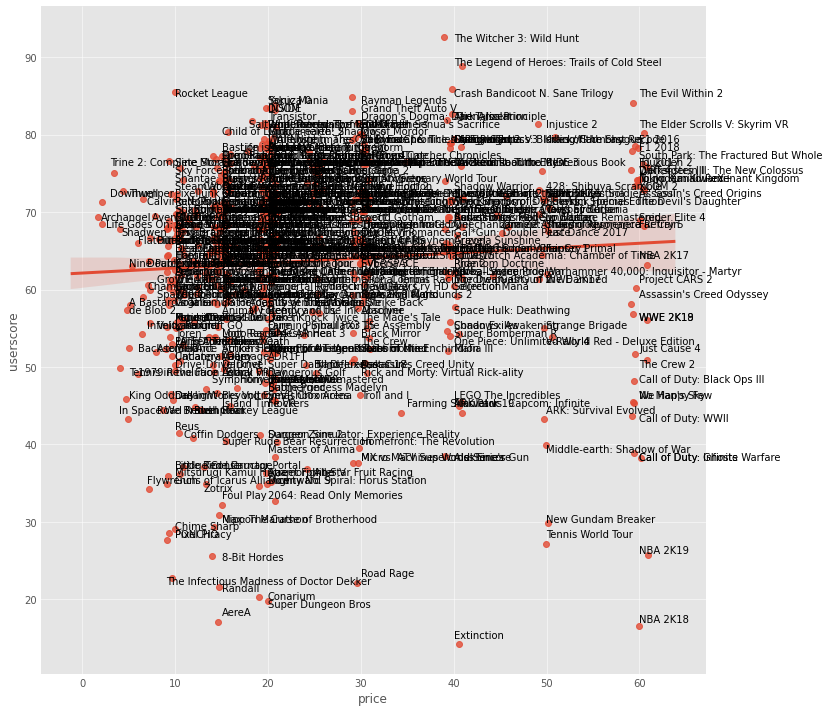

In [203]:
platform='PS4'
xone_games_price=final_games_data.loc[final_games_data.platform==platform,['game','price','user_score','metascore']]
xone_games_price=xone_games_price.dropna()



sns.lmplot('price','user_score',data=xone_games_price,x_jitter=1,y_jitter=1,size=10, height=10)
for game in range(len(xone_games_price.game)):
    plt.annotate(xone_games_price.iloc[game,0],xy=(xone_games_price.iloc[game,1],xone_games_price.iloc[game,2]))
plt.xlabel('price')
plt.ylabel('userscore')


C:\Users\adity\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.05, 0.5, 'userscore')

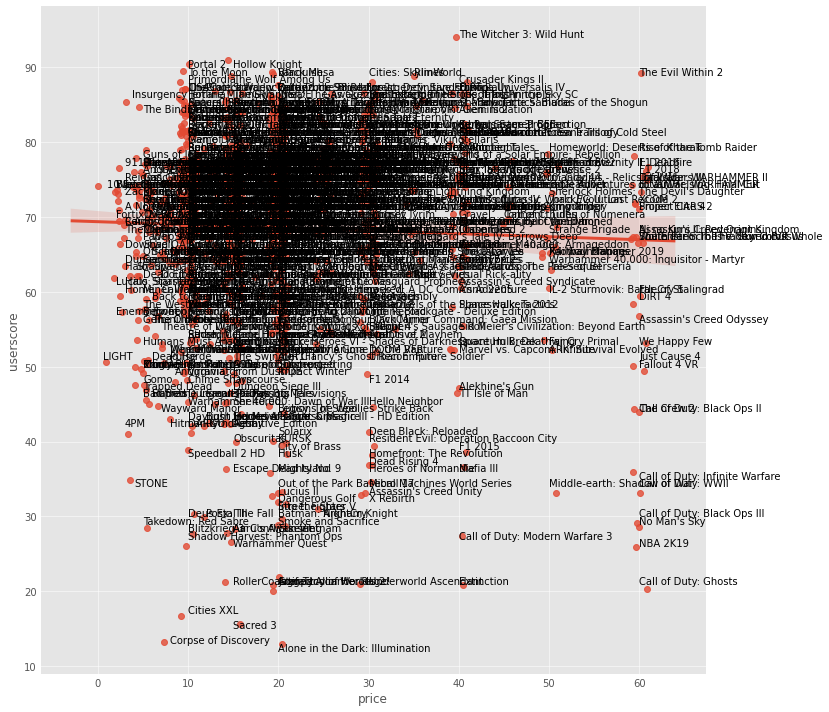

In [204]:
platform='PC'
xone_games_price=final_games_data.loc[final_games_data.platform==platform,['game','price','user_score','metascore']]
xone_games_price=xone_games_price.dropna()



sns.lmplot('price','user_score',data=xone_games_price,x_jitter=1,y_jitter=1,size=10, height=10)
for game in range(len(xone_games_price.game)):
    plt.annotate(xone_games_price.iloc[game,0],xy=(xone_games_price.iloc[game,1],xone_games_price.iloc[game,2]))
plt.xlabel('price')
plt.ylabel('userscore')


# Publisher distribution

In [214]:
def generate_boxplot(platform,score,topn=50):
    top_n_publisher=final_games_data.dropna()[final_games_data.platform==platform].groupby('publisher')[score].mean().sort_values(ascending=False)[:topn].index.to_list()
    
    platform_data=final_games_data.loc[final_games_data.platform==platform,['publisher',score]]
    
    platforms=platform_data[platform_data.publisher.isin(top_n_publisher)]
    
    _,axes=plt.subplots(figsize=(10,10))
    sns.boxplot(y='publisher',x=score,data=platforms,ax=axes)

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


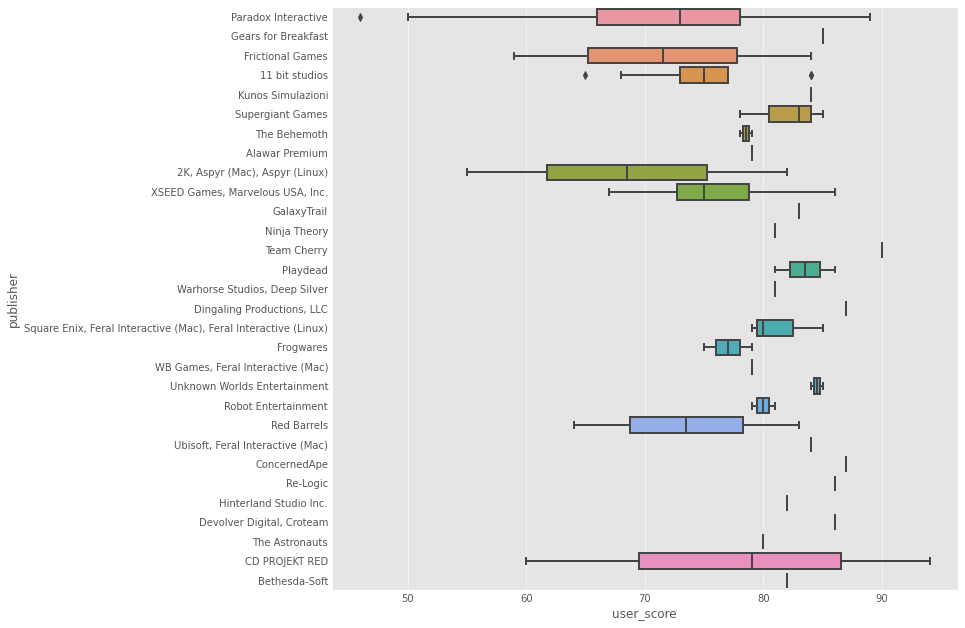

In [218]:
generate_boxplot(platform='PC',score='user_score',topn=30)

In [219]:
final_games_data

game platform                developer  \
0                          #IDARB     XONE  Other Ocean Interactive   
1         .hack//G.U. Last Recode       PC            CyberConnect2   
2         .hack//G.U. Last Recode      PS4            CyberConnect2   
3                       0RBITALIS       PC             Alan Zucconi   
4                 10 Second Ninja       PC            GameDesignDan   
...                           ...      ...                      ...   
4346        inFamous: First Light      PS4             Sucker Punch   
4347         inFamous: Second Son      PS4             Sucker Punch   
4348                   inMomentum       PC            Digital Arrow   
4349               oOo: Ascension     XONE            Kenny Creanor   
4350  theHunter: Call of the Wild       PC         Expansive Worlds   

                 genre         number_players rating  release_date  \
0               Action                    NaN      E  Jan 30, 2015   
1        Miscellaneous  No Online Multiplayer      T  Nov  3, 2017   
2        Miscellaneous  No Online Multiplayer      T  Nov  3, 2017   
3        Miscellaneous  No Online Multiplayer    NaN  May 28, 2015   
4               Action                    NaN    NaN  Mar  5, 2014   
...                ...                    ...    ...           ...   
4346  Action Adventure                    NaN      T  Aug 26, 2014   
4347            Sci-Fi  No Online Multiplayer      T  Mar 21, 2014   
4348     Miscellaneous                    NaN    NaN  Oct 31, 2011   
4349            Action     Online Multiplayer    NaN  May 25, 2018   
4350            Sports                    NaN      T  Feb 16, 2017   

      positive_critics  neutral_critics  negative_critics  positive_users  \
0                   23                8                 0              17   
1                    3                4                 0               4   
2                   14                7                 0               6   
3                    4                5                 0               0   
4                    7                5                 1               0   
...                ...              ...               ...             ...   
4346                31               39                 0              56   
4347                69               20                 1             501   
4348                 1                6                 1               6   
4349                 4                4                 0               2   
4350                 4                8                 1              11   

      neutral_users  negative_users  metascore  user_score  price  \
0                 3               1         77          69    NaN   
1                 0               1         69          72  49.99   
2                 0               0         76          79  49.99   
3                 0               0         73          73   9.99   
4                 1               0         72          74   0.99   
...             ...             ...        ...         ...    ...   
4346             29               2         73          74    NaN   
4347            131              43         80          80    NaN   
4348              2               5         59          52   9.99   
4349              1               0         70          73   9.99   
4350              3               3         64          74  19.99   

                    owners  average_playtime  median_playtime  \
0                      NaN               NaN              NaN   
1       100,000 .. 200,000               3.0              1.0   
2       100,000 .. 200,000               3.0              1.0   
3        50,000 .. 100,000               0.0              0.0   
4        50,000 .. 100,000               0.0              0.0   
...                    ...               ...              ...   
4346                   NaN               NaN              NaN   
4347                   NaN               NaN              NaN

In [227]:
final_games_data.set_index('game')

platform                developer  \
game                                                            
#IDARB                          XONE  Other Ocean Interactive   
.hack//G.U. Last Recode           PC            CyberConnect2   
.hack//G.U. Last Recode          PS4            CyberConnect2   
0RBITALIS                         PC             Alan Zucconi   
10 Second Ninja                   PC            GameDesignDan   
...                              ...                      ...   
inFamous: First Light            PS4             Sucker Punch   
inFamous: Second Son             PS4             Sucker Punch   
inMomentum                        PC            Digital Arrow   
oOo: Ascension                  XONE            Kenny Creanor   
theHunter: Call of the Wild       PC         Expansive Worlds   

                                        genre         number_players rating  \
game                                                                          
#IDARB                                 Action                    NaN      E   
.hack//G.U. Last Recode         Miscellaneous  No Online Multiplayer      T   
.hack//G.U. Last Recode         Miscellaneous  No Online Multiplayer      T   
0RBITALIS                       Miscellaneous  No Online Multiplayer    NaN   
10 Second Ninja                        Action                    NaN    NaN   
...                                       ...                    ...    ...   
inFamous: First Light        Action Adventure                    NaN      T   
inFamous: Second Son                   Sci-Fi  No Online Multiplayer      T   
inMomentum                      Miscellaneous                    NaN    NaN   
oOo: Ascension                         Action     Online Multiplayer    NaN   
theHunter: Call of the Wild            Sports                    NaN      T   

                             release_date  positive_critics  neutral_critics  \
game                                                                           
#IDARB                       Jan 30, 2015                23                8   
.hack//G.U. Last Recode      Nov  3, 2017                 3                4   
.hack//G.U. Last Recode      Nov  3, 2017                14                7   
0RBITALIS                    May 28, 2015                 4                5   
10 Second Ninja              Mar  5, 2014                 7                5   
...                                   ...               ...              ...   
inFamous: First Light        Aug 26, 2014                31               39   
inFamous: Second Son         Mar 21, 2014                69               20   
inMomentum                   Oct 31, 2011                 1                6   
oOo: Ascension               May 25, 2018                 4                4   
theHunter: Call of the Wild  Feb 16, 2017                 4                8   

                             negative_critics  positive_users  neutral_users  \
game                                                                           
#IDARB                                      0              17              3   
.hack//G.U. Last Recode                     0               4              0   
.hack//G.U. Last Recode                     0               6              0   
0RBITALIS                                   0               0              0   
10 Second Ninja                             1               0              1   
...                                       ...             ...            ...   
inFamous: First Light                       0              56             29   
inFamous: Second Son                        1             501            131   
inMomentum                                  1               6              2   
oOo: Ascension                              0               2              1   
theHunter: Call of the Wild                 1              11              3   

                             negative_users  metascore  user_score  pric

## AVERAGE PLAYTIME 

In [238]:
def playtime(platform,types='average',topn=50):
    top=final_games_data.loc[final_games_data['platform']==platform,['game','median_playtime','average_playtime','metascore','user_score']].dropna().sort_values(by=str(types)+'_playtime',ascending=False)[:topn]
    _,ax=plt.subplots(figsize=(10,10))
    sns.barplot(x=str(types)+'_playtime',y='game',data=top,ax=ax)

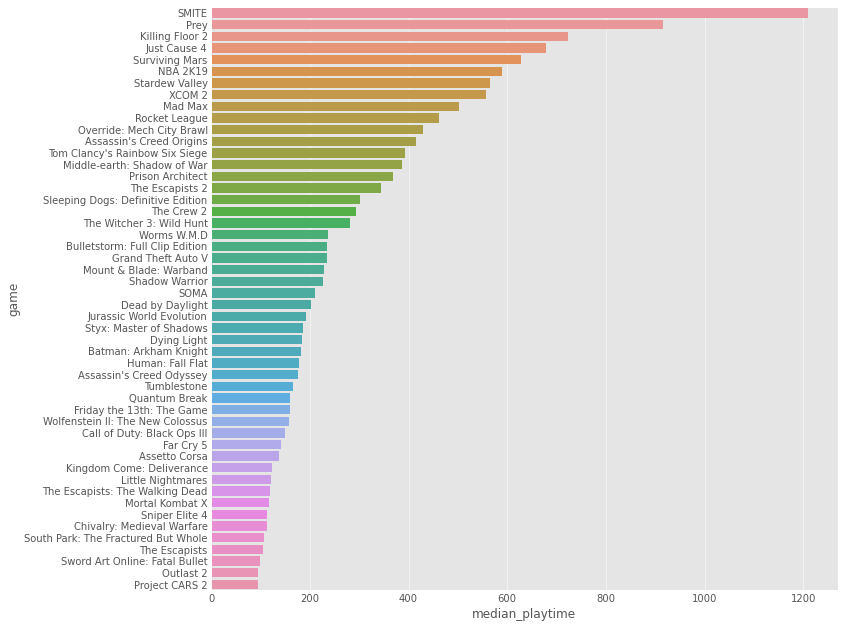

In [240]:
playtime('XONE',types='median')

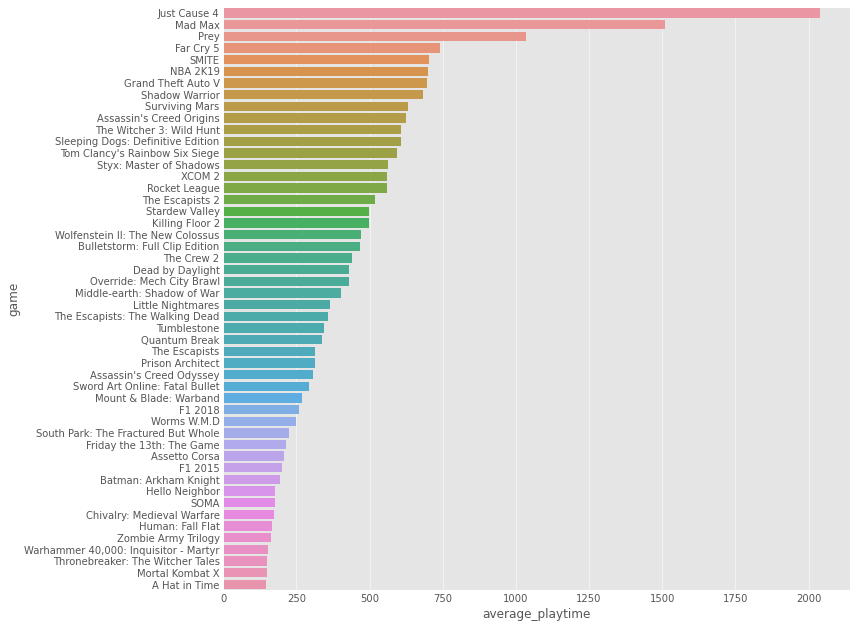

In [241]:
playtime('XONE')

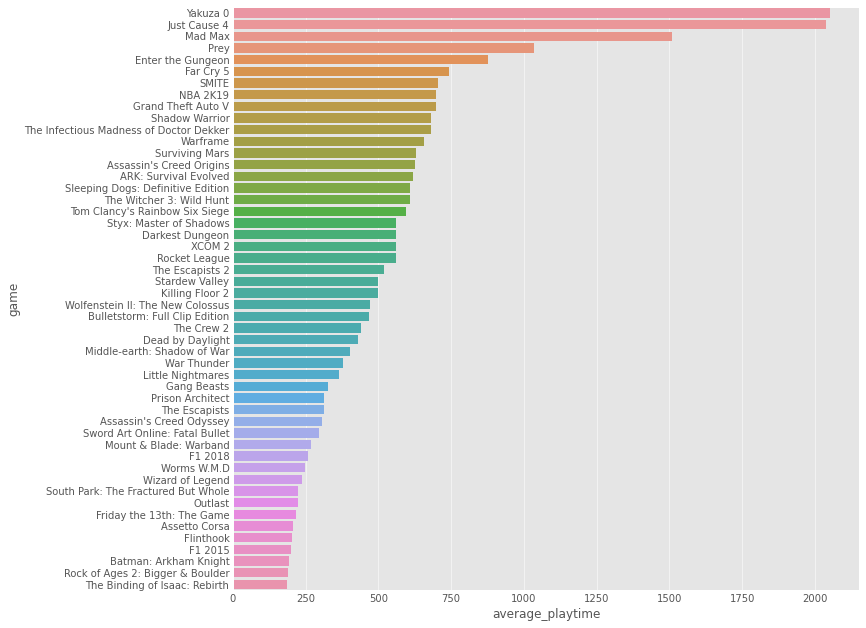

In [242]:
playtime('PS4')

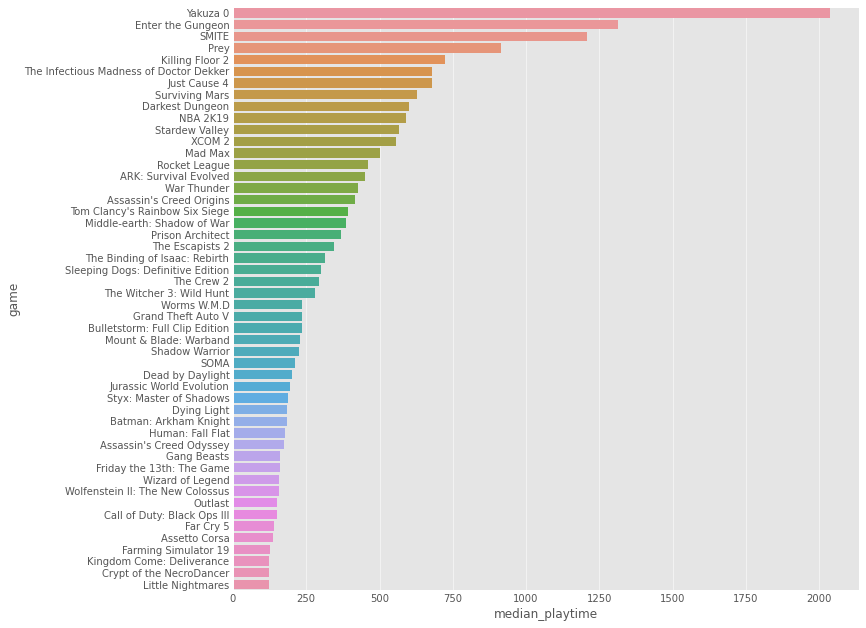

In [244]:
playtime('PS4',types='median')

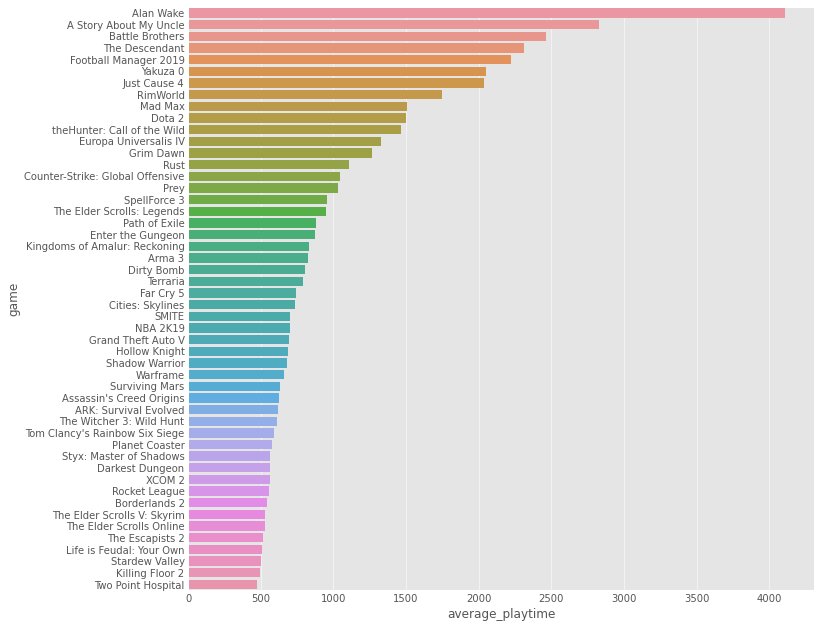

In [243]:
playtime('PC')

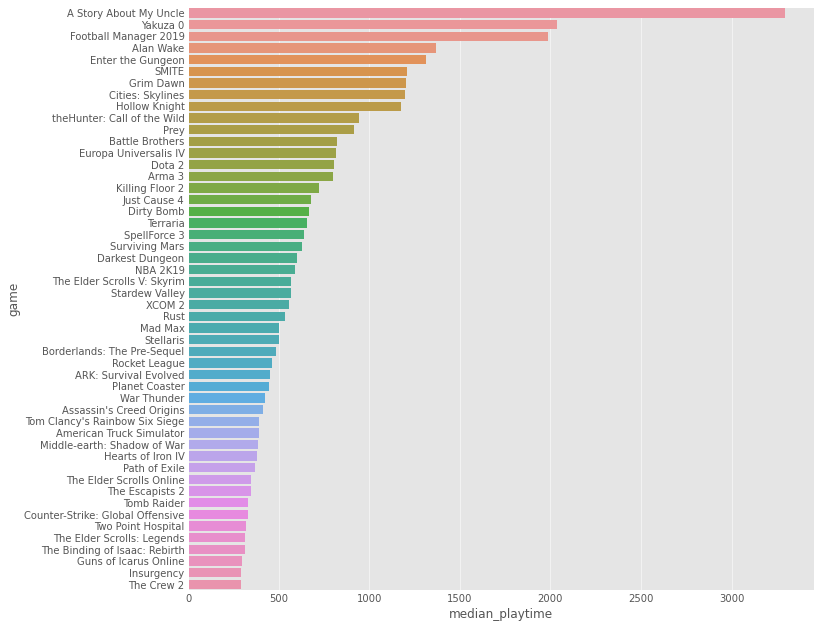

In [245]:
playtime('PC',types='median')

In [249]:
tidy_tuesday_data.sort_values(by='average_playtime',ascending=False)[:60]

number                                               game  \
3933      524                                     Clicker Heroes   
17865     271                                 Murderous Pursuits   
896        50                                        Alien Swarm   
6470      122                                         Kathy Rain   
2579       22                           FINAL FANTASY XIV Online   
2576     1340                                          Braveland   
1605       22                                          Alan Wake   
11023    3434                                         Evolvation   
18464     969                                 I am not a Monster   
11035      31       Nioh: Complete Edition / 仁王 Complete Edition   
2572      119                             A Story About My Uncle   
6956      547                                    Big Bang Empire   
11100      78                                    Battle Brothers   
6569      298                                     The Descendant   
10999    5337                               Yu-Gi-Oh! Duel Links   
2019       49                                Company of Heroes 2   
17925      14                              Football Manager 2019   
1233       12                                         The Sims 3   
12540      48                                Muv-Luv Alternative   
17850      45                                           HITMAN 2   
17926      15                                           Yakuza 0   
17947     235                                       Just Cause 4   
2210      440                                          rFactor 2   
17911    5053                             DARK SOULS: REMASTERED   
382        71                                      Mount & Blade   
6773     2082                                        DEAD RISING   
17859      16                                           RimWorld   
17843     193                                   Z1 Battle Royale   
4008       53            Shadowrun: Hong Kong - Extended Edition   
11319     455                        Space Pirates And Zombies 2   
18012    6795  DRAGON QUEST XI: Echoes of an Elusive Age - Di...   
18206     781                                     My Free Farm 2   
3948      160                                            Mad Max   
2013        5                                             Dota 2   
11061    2308                        theHunter: Call of the Wild   
239        23                S.T.A.L.K.E.R.: Shadow of Chernobyl   
18196     674                              Epic Battle Fantasy 5   
11070    4709                                Oxygen Not Included   
2049       10                              Europa Universalis IV   
6522     1230                                  Shakes and Fidget   
12101    2018                                         TurnSignal   
6466       46                                          Grim Dawn   
17919    8419                                        World War 3   
17846     214                                               Rust   
11206    3599                                          Pavlov VR   
1587       24                   Counter-Strike: Global Offensive   
11055     823                                               Prey   
17866     711                            中国式家长 / Chinese Parents   
12173    2771                   BERSERK and the Band of the Hawk   
6473     1227                             Infestation: The New Z   
11129     189                                       SpellForce 3   
17985    3858                            Star Traders: Frontiers   
11025    4241                         The Elder Scrolls: Legends   
17844       6                              MONSTER HUNTER: WORLD   
2015       15                                      Path of Exile   
6503       36                                  Enter the Gungeon   
6474        7                                     DARK SOULS III   
1281       47                       Assassin's Creed Revelation

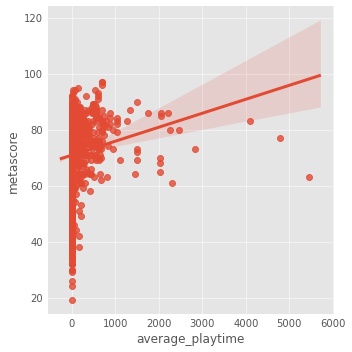

In [254]:
sns.lmplot(x='average_playtime',y='metascore',data=final_games_data)

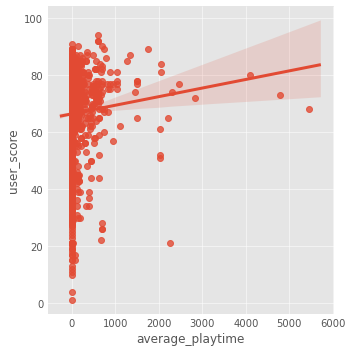

In [255]:
sns.lmplot(x='average_playtime',y='user_score',data=final_games_data)

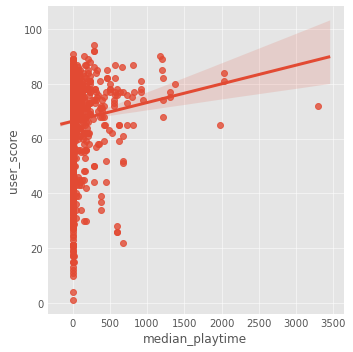

In [257]:
sns.lmplot(x='median_playtime',y='user_score',data=final_games_data)

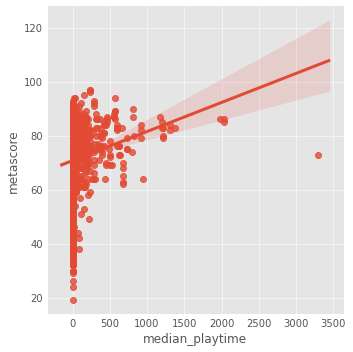

In [258]:
sns.lmplot(x='median_playtime',y='metascore',data=final_games_data)

In [453]:
tidy_tuesday_data['release_date']

number                            game  release_date  price  \
0           1                     Half-Life 2  Nov 16, 2004   9.99   
1           3          Counter-Strike: Source   Nov 1, 2004   9.99   
2          21  Counter-Strike: Condition Zero   Mar 1, 2004   9.99   
3          47         Half-Life 2: Deathmatch   Nov 1, 2004   4.99   
4          36               Half-Life: Source   Jun 1, 2004   9.99   
...       ...                             ...           ...    ...   
26683    8842                       Draw Near  Apr 15, 2018    NaN   
26684    8843                           Alone   May 1, 2018   0.99   
26685    8844                       qrth-phyl  Jul 19, 2018   4.99   
26686    8845                  Guns and Notes  Jan 26, 2018   9.99   
26687    8846   VANILLA - GARDEN OF JUDGEMENT  Aug 10, 2018  14.99   

                         owners               developer           publisher  \
0      10,000,000 .. 20,000,000                   Valve               Valve   
1      10,000,000 .. 20,000,000                   Valve               Valve   
2      10,000,000 .. 20,000,000                   Valve               Valve   
3       5,000,000 .. 10,000,000                   Valve               Valve   
4        2,000,000 .. 5,000,000                   Valve               Valve   
...                         ...                     ...                 ...   
26683               0 .. 20,000             Omniscience     Taiga Nishimura   
26684               0 .. 20,000      Killed Pixel Games  Killed Pixel Games   
26685               0 .. 20,000                  Verran              Verran   
26686               0 .. 20,000              VR Factory          VR Factory   
26687               0 .. 20,000  CHARON, Kaoru Nekofuji              CHARON   

       average_playtime  median_playtime  metascore  
0                 110.0             66.0       96.0  
1                 236.0            128.0       88.0  
2                  10.0              3.0       65.0  
3                   0.0              0.0        NaN  
4                   0.0              0.0        NaN  
...                 ...              ...        ...  
26683               0.0              0.0        NaN  
26684               0.0              0.0        NaN  
26685               0.0              0.0        NaN  
26686               0.0              0.0        NaN  
26687               0.0              0.0        NaN  

[26688 rows x 10 columns]

In [461]:

    
genre_df=pd.get_dummies(meta_data['genre'])
    
concat_data=pd.concat([meta_data,genre_df],axis=1)

meta_gamer=concat_data.drop(['platform','developer','genre','number_players','rating','release_date'],axis=1)
    



In [467]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=40)
meta_gamer1=meta_gamer.copy()
meta_gamer1.iloc[:,1:]=meta_gamer1.iloc[:,1:].apply(lambda x:(x-np.mean(x))/np.std(x))

kmeans.fit(meta_gamer1.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [468]:
kmeans.labels_

array([ 3,  3, 18, ...,  7, 15,  7])

In [470]:
meta_gamer1['labels']=kmeans.labels_

In [471]:
meta_gamer1

game  positive_critics  \
0                                    Portal 2          2.323845   
1                 The Elder Scrolls V: Skyrim          1.151065   
2     The Legend of Zelda: Ocarina of Time 3D          4.360780   
3                         Batman: Arkham City          0.842438   
4                         Super Mario 3D Land          4.175604   
...                                       ...               ...   
5694                  Modern Combat: Blackout         -0.824145   
5695                                   Fimbul         -0.824145   
5696                          Generation Zero         -0.762420   
5697                                     Vane         -0.638969   
5698                               Left Alive         -0.762420   

      neutral_critics  negative_critics  positive_users  neutral_users  \
0           -0.903961         -0.391777       16.119418       3.981579   
1           -1.033850         -0.391777       15.309226      12.684403   
2           -0.903961         -0.391777        2.452257       0.459970   
3           -1.033850         -0.391777        2.037516       1.026666   
4           -0.903961         -0.391777        2.143612       1.229057   
...               ...               ...             ...            ...   
5694        -0.384403          0.291749       -0.267672      -0.349595   
5695        -0.124625          0.291749       -0.267672      -0.349595   
5696         0.394933          1.658802       -0.229092      -0.268638   
5697         2.343273          7.127012       -0.258027      -0.268638   
5698        -0.124625          8.835828       -0.036189      -0.025769   

      negative_users  metascore  user_score        2D  ...    Sports  \
0           0.054460   2.063772    1.683375 -0.018737  ... -0.203676   
1           5.140950   1.974594    1.094303 -0.018737  ... -0.203676   
2          -0.110380   1.974594    1.683375 -0.018737  ... -0.203676   
3           0.148655   1.707062    1.462473 -0.018737  ... -0.203676   
4          -0.039734   1.617884    1.241571 -0.018737  ... -0.203676   
...              ...        ...         ...       ...  ...       ...   
5694       -0.157477  -1.681681   -0.746547 -0.018737  ... -0.203676   
5695       -0.169251  -1.770858   -3.618274 -0.018737  ... -0.203676   
5696       -0.098605  -1.949213   -0.746547 -0.018737  ... -0.203676   
5697       -0.145702  -2.038391   -0.893815 -0.018737  ... -0.203676   
5698        0.078009  -3.108520    0.873401 -0.018737  ... -0.203676   

      Strategy  Tactical  Third-Person  Traditional  Turn-Based    Tycoon  \
0    -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
1    -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
2    -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
3    -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
4    -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
...        ...       ...           ...          ...         ...       ...   
5694 -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
5695 -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
5696 -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
5697 -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   
5698 -0.286033 -0.013248      -0.02295    -0.037493   -0.013248 -0.026502   

      Virtual Life       WWI  labels  
0        -0.013248 -0.013248       3  
1        -0.013248 -0.013248       3  
2        -0.013248 -0.013248      18  
3        -0.013248 -0.013248       7  
4        -0.013248 -0.013248       1  
...            ...       ...     ...  
5694     -0.013248 -0.013248       1  
5695     -0.013248 -0.013248       7  
5696     -0.013248 -0.013248       7  
5697     -0.013248 -0.013248      15  
5698     -0.013248 -0.013248       7  

[5699 rows x 63 columns]

In [473]:
kmeans.inertia_

117174.45976070926

In [457]:
meta_data.genre.value_counts()

Action                          1846
Action Adventure                 776
Role-Playing                     596
Adventure                        505
Strategy                         431
Miscellaneous                    282
Sports                           227
General                          173
Racing                           152
Simulation                       152
Puzzle                           108
Driving                           81
Sci-Fi                            58
Fantasy                           54
Modern                            38
Shooter                           28
Horror                            25
Action RPG                        25
Platformer                        24
Historic                          18
First-Person                      13
Traditional                        8
Arcade                             6
Console-style RPG                  6
PC-style RPG                       6
Massively Multiplayer Online       5
GT / Street                        5
S

In [262]:
import zipfile

zipfile.ZipFile('steam-200k.csv.zip','r').extractall()

In [2]:
steam=pd.read_csv('steam-200k.csv')

cols=['userid','game','purchase','playtime']
steam_copy=steam.drop('0',axis=1)
steam_copy.columns=cols

NameError: name 'pd' is not defined

In [295]:
steam_copy=steam_copy[steam_copy['purchase']=='play'].drop('purchase',axis=1)

In [296]:

steam_copy

userid                        game  playtime
0       151603712  The Elder Scrolls V Skyrim     273.0
2       151603712                   Fallout 4      87.0
4       151603712                       Spore      14.9
6       151603712           Fallout New Vegas      12.1
8       151603712               Left 4 Dead 2       8.9
...           ...                         ...       ...
199990  128470551                Fallen Earth       2.4
199992  128470551                 Magic Duels       2.2
199994  128470551                 Titan Souls       1.5
199996  128470551  Grand Theft Auto Vice City       1.5
199998  128470551                        RUSH       1.4

[70489 rows x 3 columns]

In [336]:
steam_pivot=pd.pivot_table(data=steam_copy,columns='userid',index='game',values='playtime').fillna(0)

In [440]:
ign_copy=ign_data.drop('Platform',axis=1)

In [444]:
ign_copy.drop_duplicates()

Game  Score  \
0                             Wolfenstein: The New Order    7.8   
1                                           Mario Kart 8    9.0   
2                                          Sportsfriends    8.7   
5                                       Super TIME Force    7.5   
7      The Walking Dead: Season Two -- Episode 3: In ...    9.0   
...                                                  ...    ...   
17529                    Batman Forever: The Arcade Game    5.0   
17530                                      Pilotwings 64    8.2   
17531                                     Super Mario 64    9.8   
17532                                          Baku Baku    7.0   
17533  The Walking Dead: The Game -- Episode 1: A New...    8.5   

                     Genre  
0                  Shooter  
1           Racing, Action  
2      Action, Compilation  
5                  Shooter  
7                Adventure  
...                    ...  
17529               Action  
17530               Flight  
17531           Platformer  
17532               Puzzle  
17533            Adventure  

[15078 rows x 3 columns]

number                           game  release_date  price  \
0           1                    Half-Life 2  Nov 16, 2004   9.99   
6903        1    Out of the Park Baseball 17  Mar 22, 2016  19.99   
17922       1                Into the Breach  Feb 27, 2018  14.99   
122         1              Company of Heroes  Sep 11, 2006  19.99   
3922        1             Grand Theft Auto V  Apr 14, 2015  29.99   
...       ...                            ...           ...    ...   
26683    8842                      Draw Near  Apr 15, 2018    NaN   
26684    8843                          Alone   May 1, 2018   0.99   
26685    8844                      qrth-phyl  Jul 19, 2018   4.99   
26686    8845                 Guns and Notes  Jan 26, 2018   9.99   
26687    8846  VANILLA - GARDEN OF JUDGEMENT  Aug 10, 2018  14.99   

                         owners                     developer  \
0      10,000,000 .. 20,000,000                         Valve   
6903         100,000 .. 200,000  Out of the Park Developments   
17922        200,000 .. 500,000                  Subset Games   
122        500,000 .. 1,000,000           Relic Entertainment   
3922   10,000,000 .. 20,000,000                Rockstar North   
...                         ...                           ...   
26683               0 .. 20,000                   Omniscience   
26684               0 .. 20,000            Killed Pixel Games   
26685               0 .. 20,000                        Verran   
26686               0 .. 20,000                    VR Factory   
26687               0 .. 20,000        CHARON, Kaoru Nekofuji   

                          publisher  average_playtime  median_playtime  \
0                             Valve             110.0             66.0   
6903   Out of the Park Developments             332.0            110.0   
17922                  Subset Games               0.0              0.0   
122                            SEGA               0.0              0.0   
3922                 Rockstar Games             697.0            234.0   
...                             ...               ...              ...   
26683               Taiga Nishimura               0.0              0.0   
26684            Killed Pixel Games               0.0              0.0   
26685                        Verran               0.0              0.0   
26686                    VR Factory               0.0              0.0   
26687                        CHARON               0.0              0.0   

       metascore  
0           96.0  
6903        92.0  
17922       90.0  
122         93.0  
3922        96.0  
...          ...  
26683        NaN  
26684        NaN  
26685        NaN  
26686        NaN  
26687        NaN  

[26688 rows x 10 columns]

In [349]:
from scipy.sparse import csr_matrix
# convert dataframe of movie features to scipy sparse matrix
steam_features = csr_matrix(steam_pivot.values)
steam_features

<3600x11350 sparse matrix of type '<class 'numpy.float64'>'
	with 70477 stored elements in Compressed Sparse Row format>

In [397]:
hashmap = {game: i for i,game in enumerate(list(steam_pivot.index))}

In [398]:
def fuzzy_matching(hashmap, fav_game):
        """
        return the closest match via fuzzy ratio.
        If no match found, return None
        Parameters
        ----------
        hashmap: dict, map movie title name to index of the movie in data
        fav_movie: str, name of user input movie
        Return
        ------
        index of the closest match
        """
        match_tuple = []
        # get match
        for title, idx in hashmap.items():
            ratio = fuzz.token_set_ratio(title.lower(), fav_game.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print('Oops! No match is found')
        else:
            print('Found possible matches in our database: '
                  '{0}\n'.format([x[0] for x in match_tuple]))
        return match_tuple[0][1]

In [399]:
fuzzy_matching(hashmap,'Call of Duty')

Found possible matches in our database: ['Commandos Beyond the Call of Duty', 'Call of Duty World at War', 'Call of Duty United Offensive', 'Call of Duty Modern Warfare 3 - Multiplayer', 'Call of Duty Modern Warfare 3', 'Call of Duty Modern Warfare 2 - Multiplayer', 'Call of Duty Modern Warfare 2', 'Call of Duty Ghosts - Multiplayer', 'Call of Duty Ghosts', 'Call of Duty Black Ops III', 'Call of Duty Black Ops II - Zombies', 'Call of Duty Black Ops II - Multiplayer', 'Call of Duty Black Ops II', 'Call of Duty Black Ops - OSX', 'Call of Duty Black Ops - Multiplayer OSX', 'Call of Duty Black Ops - Multiplayer', 'Call of Duty Black Ops', 'Call of Duty Advanced Warfare - Multiplayer', 'Call of Duty Advanced Warfare', 'Call of Duty 4 Modern Warfare', 'Call of Duty 2', 'Call of Duty', 'Port of Call', 'S.T.A.L.K.E.R. Call of Pripyat', 'Call of Tomsk-7', 'Call of Juarez The Cartel', 'Call of Juarez Gunslinger', 'Call of Juarez Bound in Blood', 'Call of Juarez', 'Call of Cthulhu Dark Corners of

634

In [400]:
steam_pivot

userid                                              5250       76767      \
game                                                                       
007 Legends                                               0.0        0.0   
0RBITALIS                                                 0.0        0.0   
1... 2... 3... KICK IT! (Drop That Beat Like an...        0.0        0.0   
10 Second Ninja                                           0.0        0.0   
10,000,000                                                0.0        0.0   
...                                                       ...        ...   
rymdkapsel                                                0.0        0.0   
sZone-Online                                              0.0        0.0   
the static speaks my name                                 0.0        0.0   
theHunter                                                 0.0        0.0   
theHunter Primal                                          0.0        0.0   

userid                                              86540      144736     \
game                                                                       
007 Legends                                               0.0        0.0   
0RBITALIS                                                 0.0        0.0   
1... 2... 3... KICK IT! (Drop That Beat Like an...        0.0        0.0   
10 Second Ninja                                           0.0        0.0   
10,000,000                                                0.0        0.0   
...                                                       ...        ...   
rymdkapsel                                                0.0        0.0   
sZone-Online                                              0.0        0.0   
the static speaks my name                                 0.0        0.0   
theHunter                                                 0.0        0.0   
theHunter Primal                                          0.0        0.0   

userid                                              181212     229911     \
game                                                                       
007 Legends                                               0.0        0.0   
0RBITALIS                                                 0.0        0.0   
1... 2... 3... KICK IT! (Drop That Beat Like an...        0.0        0.0   
10 Second Ninja                                           0.0        0.0   
10,000,000                                                0.0        0.0   
...                                                       ...        ...   
rymdkapsel                                                0.0        0.0   
sZone-Online                                              0.0        0.0   
the static speaks my name                                 0.0        0.0   
theHunter                                                 0.0        0.0   
theHunter Primal                                          0.0        0.0   

userid                                              298950     381543     \
game                                                                       
007 Legends                                               0.0        0.0   
0RBITALIS                                                 0.0        0.0   
1... 2... 3... KICK IT! (Drop That Beat Like an...        0.0        0.0   
10 Second Ninja                                           0.0        0.0   
10,000,000                                                0.0        0.0   
...                                                       ...        ...   
rymdkapsel                                                0.0        0.0   
sZone-Online                                              0.0        0.0   
the static speaks my name                                 0.0        0.0   
theHunter                                                 0.0        0.0   
theHunter Primal                                          0.0        0.0   

userid                                      

In [401]:
def inference(model, data, hashmap,
                   fav_game, n_recommendations):
        """
        return top n similar movie recommendations based on user's input movie
        Parameters
        ----------
        model: sklearn model, knn model
        data: movie-user matrix
        hashmap: dict, map movie title name to index of the movie in data
        fav_movie: str, name of user input movie
        n_recommendations: int, top n recommendations
        Return
        ------
        list of top n similar movie recommendations
        """
        # fit
        model.fit(data)
        # get input movie index
        print('You have input movie:', fav_game)
        idx = fuzzy_matching(hashmap, fav_game)
        # inference
        print('Recommendation system start to make inference')
        print('......\n')
        t0 = time.time()
        distances, indices = model.kneighbors(
            data[idx],
            n_neighbors=n_recommendations+1)
        # get list of raw idx of recommendations
        raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[:0:-1]
        print('It took my system {:.2f}s to make inference \n\
              '.format(time.time() - t0))
        # return recommendation (movieId, distance)
        return raw_recommends

In [402]:
import time
def make_recommendations(fav_game, n_recommendations,hashmap,data,model_knn):
        """
        make top n movie recommendations
        Parameters
        ----------
        fav_movie: str, name of user input movie
        n_recommendations: int, top n recommendations
        """
        # get data
        game_user_mat_sparse, hashmap = data,hashmap
        # get recommendations
        raw_recommends = inference(
            model_knn, game_user_mat_sparse, hashmap,
            fav_game, n_recommendations)
        # print results
        reverse_hashmap = {v: k for k, v in hashmap.items()}
        print('Recommendations for {}:'.format(fav_game))
        for i, (idx, dist) in enumerate(raw_recommends):
            print('{0}: {1}, with distance '
                  'of {2}'.format(i+1, reverse_hashmap[idx], dist))

In [11]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['kd_tree'])

['chebyshev',
 'cityblock',
 'euclidean',
 'infinity',
 'l1',
 'l2',
 'manhattan',
 'minkowski',
 'p']

In [13]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

In [1]:
make_recommendations('Tomb Raider',10,hashmap,steam_features,model_knn)

NameError: name 'make_recommendations' is not defined

<3600x3600 sparse matrix of type '<class 'numpy.float64'>'
	with 72000 stored elements in Compressed Sparse Row format>

In [294]:
!pip install pyspark

  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257935 sha256=4f85707f2d266a163f6898102adc1050f4219b8983c25490543e5ae1444623a6
  Stored in directory: C:\Users\adity\AppData\Local\pip\Cache\wheels\bf\db\04\61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [ ]:
# Split the data into training and test sets
(training, test) = msd.randomSplit([0.8, 0.2])

#Building 5 folds within the training set.
train1, train2, train3, train4, train5 = training.randomSplit([0.2, 0.2, 0.2, 0.2, 0.2], seed = 1)
fold1 = train2.union(train3).union(train4).union(train5)
fold2 = train3.union(train4).union(train5).union(train1)
fold3 = train4.union(train5).union(train1).union(train2)
fold4 = train5.union(train1).union(train2).union(train3)
fold5 = train1.union(train2).union(train3).union(train4)

foldlist = [(fold1, train1), (fold2, train2), (fold3, train3), (fold4, train4), (fold5, train5)]

# Empty list to fill with ROEMs from each model
ROEMS = []

# Loops through all models and all folds
for model in model_list:
    for ft_pair in foldlist:

        # Fits model to fold within training data
        fitted_model = model.fit(ft_pair[0])

        # Generates predictions using fitted_model on respective CV test data
        predictions = fitted_model.transform(ft_pair[1])

        # Generates and prints a ROEM metric CV test data
        r = ROEM(predictions)
        print ("ROEM: ", r)

    # Fits model to all of training data and generates preds for test data
    v_fitted_model = model.fit(training)
    v_predictions = v_fitted_model.transform(test)
    v_ROEM = ROEM(v_predictions)

In [325]:
ign_data.merge(steam_copy,left_on='Game',right_on='game')['Game']

0        Borderlands 2
1        Borderlands 2
2        Borderlands 2
3        Borderlands 2
4        Borderlands 2
             ...      
45188            Quake
45189              MDK
45190          Descent
45191          Descent
45192          Descent
Name: Game, Length: 45193, dtype: object

In [315]:
url='https://api-v3.igdb.com/games/69359'
import requestsasg
ign=requests.get(url,headers={"user-key":'ed39204dbfa9ced340dcc8aa4d3bdbbb'})

In [316]:
ign.content

b'[\n  {\n    "id": 69359\n  }\n]'

In [2]:
import rawgpy

rawg = rawgpy.RAWG("User-Agent, this should identify your app")
results = rawg.collection_games
game = results[0]
game.populate()  # get additional info for the game

print(game.name)

print(game.description)

for store in game.stores:
    print(store.url)

TypeError: 'method' object is not subscriptable

In [20]:

rawg = rawgpy.RAWG("User-Agent, this should identify your app")
results = rawg.search("Titanfall")  # defaults to returning the top 5 results
game = results[0]
game.populate()  # get additional info for the game

print(game.name)
print(game.score)

print(game.description)

for store in game.stores:
    print(store.url)

Titanfall
66.722534
<p>Titanfall is a sci-fi multiplayer FPS developed by Respawn Entertainment.</p>
<p>Set in the distant future, where the deep-space travel is finally available to the humankind, colonies are established on distant planets. Interstellar Manufacturing Corporation began exploiting the colonists, mining the resources on the so-called Frontier planets. Many of the colonists join the resistance to fight back.</p>
<p>The game features both infantry and mech combat. The mechs known as Titans are common in Titanfall&#39;s world. You play as a pilot. Pilots are elite spec-ops soldiers that use the battlefield as their playground. The loadout system is present in the game. The players are free to use whatever weapon they like and choose from a variety of different camouflages. Pilots are equipped with jetpacks that allow for wall running. Pilots also possess special hacking knives that are helpful in hacking the enemies robots. </p>
<p>Titans are available for the players afte

In [18]:
game

In [24]:
game.achievements_count

177

In [25]:
game.alternative_names

[]

In [26]:
game.background_image

'https://media.rawg.io/media/games/979/979155841412068e7adf8c83dee94a4a.jpg'

In [27]:
game.categories

In [30]:
game.creators_count

10

In [32]:
game.rating

4.03

In [33]:
game.score

'66.33984'

In [34]:
game.description

'<p>Titanfall is a sci-fi multiplayer FPS developed by Respawn Entertainment.</p>\n<p>Set in the distant future, where the deep-space travel is finally available to the humankind, colonies are established on distant planets. Interstellar Manufacturing Corporation began exploiting the colonists, mining the resources on the so-called Frontier planets. Many of the colonists join the resistance to fight back.</p>\n<p>The game features both infantry and mech combat. The mechs known as Titans are common in Titanfall&#39;s world. You play as a pilot. Pilots are elite spec-ops soldiers that use the battlefield as their playground. The loadout system is present in the game. The players are free to use whatever weapon they like and choose from a variety of different camouflages. Pilots are equipped with jetpacks that allow for wall running. Pilots also possess special hacking knives that are helpful in hacking the enemies robots. </p>\n<p>Titans are available for the players after they are built

In [35]:
game.developers

[bluepoint-games, respawn-entertainment]

In [37]:
game.game_series_count

1

In [40]:
game.json

{'id': 42230,
 'slug': 'titanfall',
 'name': 'Titanfall',
 'name_original': 'Titanfall',
 'description': '<p>Titanfall is a sci-fi multiplayer FPS developed by Respawn Entertainment.</p>\n<p>Set in the distant future, where the deep-space travel is finally available to the humankind, colonies are established on distant planets. Interstellar Manufacturing Corporation began exploiting the colonists, mining the resources on the so-called Frontier planets. Many of the colonists join the resistance to fight back.</p>\n<p>The game features both infantry and mech combat. The mechs known as Titans are common in Titanfall&#39;s world. You play as a pilot. Pilots are elite spec-ops soldiers that use the battlefield as their playground. The loadout system is present in the game. The players are free to use whatever weapon they like and choose from a variety of different camouflages. Pilots are equipped with jetpacks that allow for wall running. Pilots also possess special hacking knives that are 

In [110]:
cols=['name','description','released','background_image','website','rating','playtime','achievements_count','twitch_count','youtube_count',
     'ratings_count','suggestions_count','genres']

game_dict=game.json

In [111]:
game_dict

<bound method Response.json of <Response [200]>>

In [15]:
import rawgpy
rawg = rawgpy.RAWG("User-Agent, this should identify your app")
results = rawg.search("Titanfall")  # defaults to returning the top 5 results
game = results[0]
game.populate()  # get additional info for the game

print(game.name)
print(game.score)
print(game.description)

for store in game.stores:
    print(store.url)

Titanfall
66.70181
<p>Titanfall is a sci-fi multiplayer FPS developed by Respawn Entertainment.</p>
<p>Set in the distant future, where the deep-space travel is finally available to the humankind, colonies are established on distant planets. Interstellar Manufacturing Corporation began exploiting the colonists, mining the resources on the so-called Frontier planets. Many of the colonists join the resistance to fight back.</p>
<p>The game features both infantry and mech combat. The mechs known as Titans are common in Titanfall&#39;s world. You play as a pilot. Pilots are elite spec-ops soldiers that use the battlefield as their playground. The loadout system is present in the game. The players are free to use whatever weapon they like and choose from a variety of different camouflages. Pilots are equipped with jetpacks that allow for wall running. Pilots also possess special hacking knives that are helpful in hacking the enemies robots. </p>
<p>Titans are available for the players after

In [55]:
results

[]

In [57]:
!pip install rawg

In [60]:
import time
import rawg
from rawg.rest import ApiException
from pprint import pprint
# Defining the host is optional and defaults to https://api.rawg.io/api
# See configuration.py for a list of all supported configuration parameters.
configuration = rawg.Configuration(
    host = "https://api.rawg.io/api"
)


# Enter a context with an instance of the API client
with rawg.ApiClient() as api_client:
    # Create an instance of the API class
    api_instance = rawg.GamesApi(api_client)

    try:
        # Get a list of games.
        api_response = api_instance.games_list()
    except ApiException as e:
        print("Exception when calling GamesApi->games_list: %s\n" % e)
        
    

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000014D85DA7A08>


AttributeError: __enter__

In [72]:
import asyncio

import rawg


async def requests():
    async with rawg.ApiClient() as api_client:
        # Create an instance of the API class
        api = rawg.GamesApi(api_client)

        # Making requests
        coros = [api.games_list()]

        # Waiting for requests
        for coro in asyncio.as_completed(coros):
            game: rawg.GameSingle = await coro
            print('        Name |', game.name)
            print('    Released |', game.released)
            print('      Rating |', game.rating)
            print('Achievements |', game.achievements_count)
            print('     Website |', game.website)
            print('  Metacritic |', game.metacritic)
            print('——————————————————————————————————————————————')
        return coros

In [76]:
coros=requests()

In [84]:
from __future__ import print_function
import time
import rawg
from rawg.rest import ApiException
from pprint import pprint
# Defining the host is optional and defaults to https://api.rawg.io/api
# See configuration.py for a list of all supported configuration parameters.
configuration = rawg.Configuration(
    host = "https://api.rawg.io/api"
)


# Enter a context with an instance of the API client
with rawg.ApiClient() as api_client:
    # Create an instance of the API class
    api_instance = rawg.GamesApi(api_client)
    page = 56 # int | A page number within the paginated result set. (optional)
    page_size = 56 # int | Number of results to return per page. (optional)
    search = 'search_example' # str | Search query. (optional)
    parent_platforms = 'parent_platforms_example' # str | Filter by parent platforms, for example: `1,2,3`. (optional)
    platforms = 'platforms_example' # str | Filter by platforms, for example: `4,5`. (optional)
    stores = 'stores_example' # str | Filter by stores, for example: `5,6`. (optional)
    developers = 'developers_example' # str | Filter by developers, for example: `1612,18893` or `valve-software,feral-interactive`. (optional)
    publishers = 'publishers_example' # str | Filter by publishers, for example: `354,20987` or `electronic-arts,microsoft-studios`. (optional)
    genres = 'genres_example' # str | Filter by genres, for example: `4,51` or `action,indie`. (optional)
    tags = 'tags_example' # str | Filter by tags, for example: `31,7` or `singleplayer,multiplayer`. (optional)
    creators = 'creators_example' # str | Filter by creators, for example: `78,28` or `cris-velasco,mike-morasky`. (optional)
    dates = 'dates_example' # str | Filter by a release date, for example: `2010-01-01,2018-12-31.1960-01-01,1969-12-31`. (optional)
    platforms_count = 56 # int | Filter by platforms count, for example: `1`. (optional)
    exclude_collection = 56 # int | Exclude games from a particular collection, for example: `123`. (optional)
    exclude_additions = True # bool | Exclude additions. (optional)
    exclude_parents = True # bool | Exclude games which have additions. (optional)
    exclude_game_series = True # bool | Exclude games which included in a game series. (optional)
    ordering = 'ordering_example' # str | Available fields: `name`, `released`, `added`, `created`, `rating`. You can reverse the sort order adding a hyphen, for example: `-released`. (optional)

    try:
        # Get a list of games.
        api_response = api_instance.games_list(page=page, page_size=page_size, search=search, parent_platforms=parent_platforms, platforms=platforms, stores=stores, developers=developers, publishers=publishers, genres=genres, tags=tags, creators=creators, dates=dates, platforms_count=platforms_count, exclude_collection=exclude_collection, exclude_additions=exclude_additions, exclude_parents=exclude_parents, exclude_game_series=exclude_game_series, ordering=ordering)
        pprint(api_response)
    except ApiException as e:
        print("Exception when calling GamesApi->games_list: %s\n" % e)
        
    api_client.session.close()

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000014D86B221C8>


AttributeError: __enter__

In [86]:
from rawg import Data
Data.

<function Data.mro()>

In [2]:
import requests
from tqdm import tqdm
pages=list(range(1,83))

req_results=[]
for page in tqdm(pages):
    url=f"https://api.rawg.io/api/games?page={page}&page_size=60"
    game=requests.get(url)
    
    try:
        req_results.append(game.json())
        
    except requests.RequestException as e:
        print("Can't connect",e)

100%|██████████████████████████████████████████████████████████████████████████████████| 82/82 [01:40<00:00,  1.14s/it]

limit_output extension: Maximum message size of 10000 exceeded with 10080 characters

In [6]:
len(req_results)

82

In [7]:
cols=['name','released','background_image','rating','metacritic','playtime',
      'suggestions_count','reviews_count','genres']
import pandas as pd
from collections import defaultdict
games_data=defaultdict(list)
for page in tqdm(range(1,82)):
    
    for game in range(len(req_results)):
        
        for col in cols:
            print(col)
            results=req_results[page]['results']
            games_data[col].append(results[game][col])
    

  0%|                                                                                           | 0/81 [00:00<?, ?it/s]

name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image
rating
metacritic
playtime
suggestions_count
reviews_count
genres
name
released
background_image

IndexError: list index out of range

In [188]:
df = pd.DataFrame([v for _, v in games_data.items()], 
                   columns=cols)

ValueError: 9 columns passed, passed data had 3240 columns

In [202]:
import numpy as np
games=pd.DataFrame(np.array(games_data['name']),columns=['name'])
for k,v in games_data.items():
    games[k]=np.array(v)
    

In [216]:

def get_genres(x):
    genres=[]
    if x:
        for genre in x:
            genres.append(genre['name'])
        
    return genres

In [217]:
games['genres'].apply(get_genres)

0                         [Action, Shooter]
1                                  [Action]
2          [Action, Shooter, Arcade, Indie]
3                       [Action, Adventure]
4                      [Action, Platformer]
                       ...                 
3235     [Action, Adventure, Casual, Indie]
3236                               [Action]
3237    [Action, Simulation, Casual, Indie]
3238    [Simulation, Casual, Family, Indie]
3239                       [Action, Arcade]
Name: genres, Length: 3240, dtype: object

In [175]:
import requests

flag=True
req_results=[]
count=0
while flag:
    url=f"https://api.rawg.io/api/games"
    game=requests.get(url)
    
    response=game.json()
    
    
    if (response['next'] is not None) and (count<3):
        print(response['next'])
        try:
            req_results.append(game.json())
        
        except requests.RequestException as e:
            print("Can't connect",e)
        count+=1
    elif count==3:
        flag=False
    else:
        flag=False

https://api.rawg.io/api/games?page=2
https://api.rawg.io/api/games?page=2
https://api.rawg.io/api/games?page=2


In [220]:
games[['rating','metacritic','playtime','suggestions_count','reviews_count']]

rating metacritic  playtime  suggestions_count  reviews_count
0       4.05         88         3                660           1114
1       3.35       None         1                238            539
2       4.33         85         5                380           1499
3       4.53         93         0                448           2197
4       4.08         81         3                361           1272
...      ...        ...       ...                ...            ...
3235    1.69       None         3                177             16
3236    2.35       None         1                324             26
3237    1.50       None         3                202             20
3238    2.43       None         5                135             28
3239    3.42       None         2                428             48

[3240 rows x 5 columns]

In [240]:
games.isna().sum()

name                    0
released               26
background_image        5
rating                  0
metacritic           1440
playtime                0
suggestions_count       0
reviews_count           0
genres                  0
dtype: int64

req_results[0

In [180]:
len(req_results[0])

13